In [1]:
#Dataset Link : https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data/data

In [97]:
#Notebook : https://www.kaggle.com/code/humagonen/time-series-arima-sarima-prophet-rnn-lstm-gru

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf


import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
# read train data

df = pd.read_csv("../datasets/DailyDelhiClimateTrain.csv", 
                 parse_dates=['date'],  # change to date time format
                 index_col="date")
df


meantemp  humidity  wind_speed  meanpressure
date                                                    
2013-01-01    10.000    84.500       0.000      1015.667
2013-01-02     7.400    92.000       2.980      1017.800
2013-01-03     7.167    87.000       4.633      1018.667
2013-01-04     8.667    71.333       1.233      1017.167
2013-01-05     6.000    86.833       3.700      1016.500
...              ...       ...         ...           ...
2016-12-28    17.217    68.043       3.548      1015.565
2016-12-29    15.238    87.857       6.000      1016.905
2016-12-30    14.095    89.667       6.267      1017.905
2016-12-31    15.053    87.000       7.325      1016.100
2017-01-01    10.000   100.000       0.000      1016.000

[1462 rows x 4 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [6]:
df.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [7]:
df.describe().T

count     mean     std    min      25%      50%      75%  \
meantemp     1462.000   25.496   7.348  6.000   18.857   27.714   31.306   
humidity     1462.000   60.772  16.770 13.429   50.375   62.625   72.219   
wind_speed   1462.000    6.802   4.562  0.000    3.475    6.222    9.238   
meanpressure 1462.000 1011.105 180.232 -3.042 1001.580 1008.563 1014.945   

                  max  
meantemp       38.714  
humidity      100.000  
wind_speed     42.220  
meanpressure 7679.333

In [8]:
# creating new features for EDA

df["year"] = df.index.year
df['month'] = df.index.month 
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df["date"] = df.index.date

df.head()

meantemp  humidity  wind_speed  meanpressure  year  month  day  \
date                                                                         
2013-01-01    10.000    84.500       0.000      1015.667  2013      1    1   
2013-01-02     7.400    92.000       2.980      1017.800  2013      1    2   
2013-01-03     7.167    87.000       4.633      1018.667  2013      1    3   
2013-01-04     8.667    71.333       1.233      1017.167  2013      1    4   
2013-01-05     6.000    86.833       3.700      1016.500  2013      1    5   

            dayofweek        date  
date                               
2013-01-01          1  2013-01-01  
2013-01-02          2  2013-01-02  
2013-01-03          3  2013-01-03  
2013-01-04          4  2013-01-04  
2013-01-05          5  2013-01-05

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
 4   year          1462 non-null   int64  
 5   month         1462 non-null   int64  
 6   day           1462 non-null   int64  
 7   dayofweek     1462 non-null   int64  
 8   date          1462 non-null   object 
dtypes: float64(4), int64(4), object(1)
memory usage: 114.2+ KB


In [10]:
# creating dark gray template(xgridoff_dark) from xgridoff template: 

import plotly.io as pio

# Get the 'xgridoff' template
xgridoff_template = pio.templates['xgridoff']

# Customize the template for dark mode
xgridoff_template.layout.paper_bgcolor = 'rgb(25, 25, 25)'  # very dark gray background
xgridoff_template.layout.plot_bgcolor = 'rgb(35, 35, 35)'  # Dark gray plot background

xgridoff_template.layout.font.color = 'lightgray'  # Light gray font color

# Adjust gridline color and width
xgridoff_template.layout.xaxis.gridcolor = 'rgba(200, 200, 200, 0.3)'  # Light gray with transparency
xgridoff_template.layout.yaxis.gridcolor = 'rgba(200, 200, 200, 0.3)'  # Light gray with transparency
xgridoff_template.layout.xaxis.gridwidth = 1  # Set gridline width
xgridoff_template.layout.yaxis.gridwidth = 1  # Set gridline width

# Update Plotly templates with the modified 'xgridoff' template
pio.templates['xgridoff_dark'] = xgridoff_template

In [11]:
fig_meantemp = px.line(df, x=df.index, y='meantemp', title='Mean Temperature Over Time')
fig_meantemp.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_meantemp.show()

fig_humidity = px.line(df, x=df.index, y='humidity', title='Humidity Over Time')
fig_humidity.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_humidity.show()

fig_wind_speed = px.line(df, x=df.index, y='wind_speed', title='Wind Speed Over Time')
fig_wind_speed.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_wind_speed.show()

fig_meanpressure = px.line(df, x=df.index, y='meanpressure', title='Mean Pressure Over Time')
fig_meanpressure.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_meanpressure.show()


In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.subplots as sp

# Perform seasonal decomposition
result = seasonal_decompose(df['meantemp'], model='additive', period=365)

# Plot the decomposed components
fig = sp.make_subplots(rows=4, cols=1, shared_xaxes=True, 
                       subplot_titles=['Observed', 'Trend', 'Seasonal', 'Residual'])

fig.add_trace(go.Scatter(x=df.index, y=result.observed, mode='lines', name='Observed'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.trend, mode='lines', name='Trend'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.seasonal, mode='lines', name='Seasonal'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.resid, mode='lines', name='Residual'), row=4, col=1)

fig.update_layout(template= 'xgridoff_dark',height=800, title='Seasonal Decomposition of Mean Temperature')
fig.show()

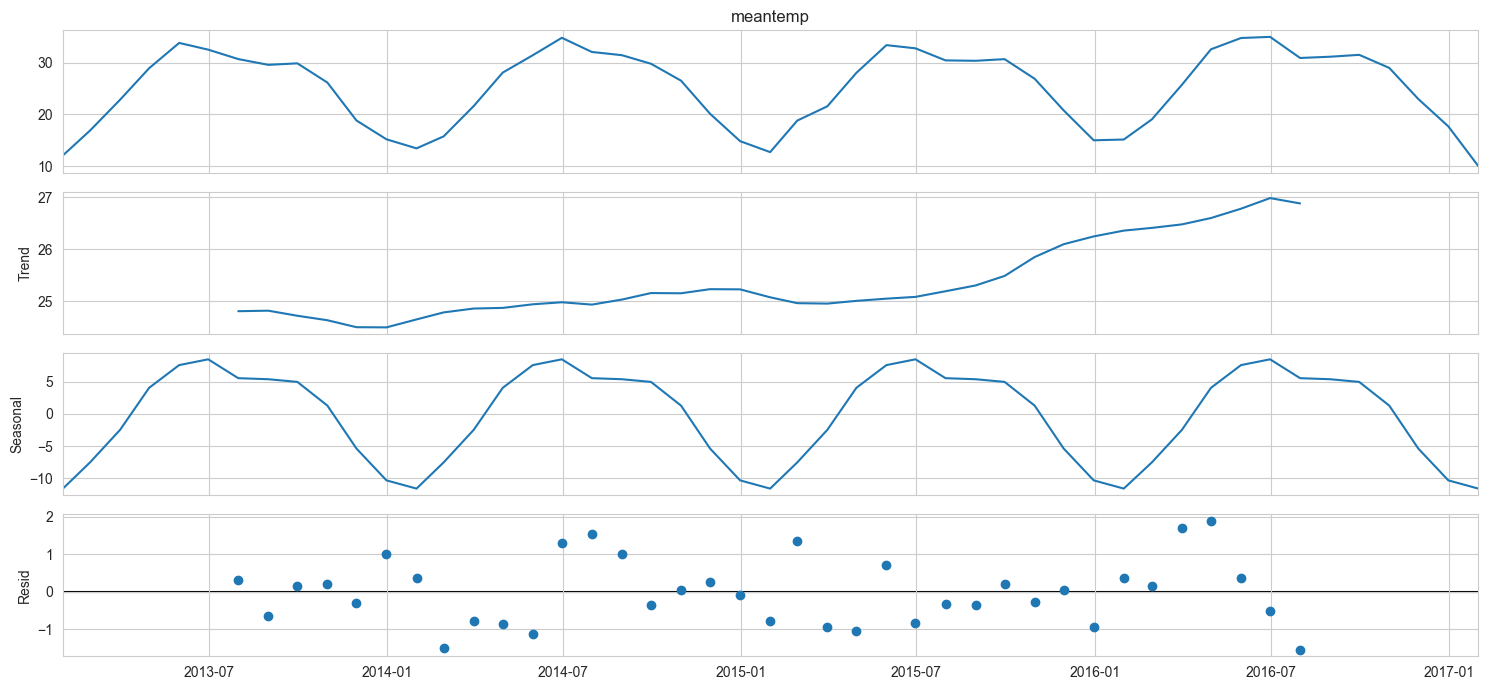

In [13]:
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [15, 7]

# Select the 'meantemp' column and resample it to monthly frequency
data_monthly = df['meantemp'].resample('M').mean()

# Perform seasonal decomposition for 'meantemp' feature
decomposition = sm.tsa.seasonal_decompose(data_monthly)

# Plot the decomposition
fig = decomposition.plot()
plt.show()

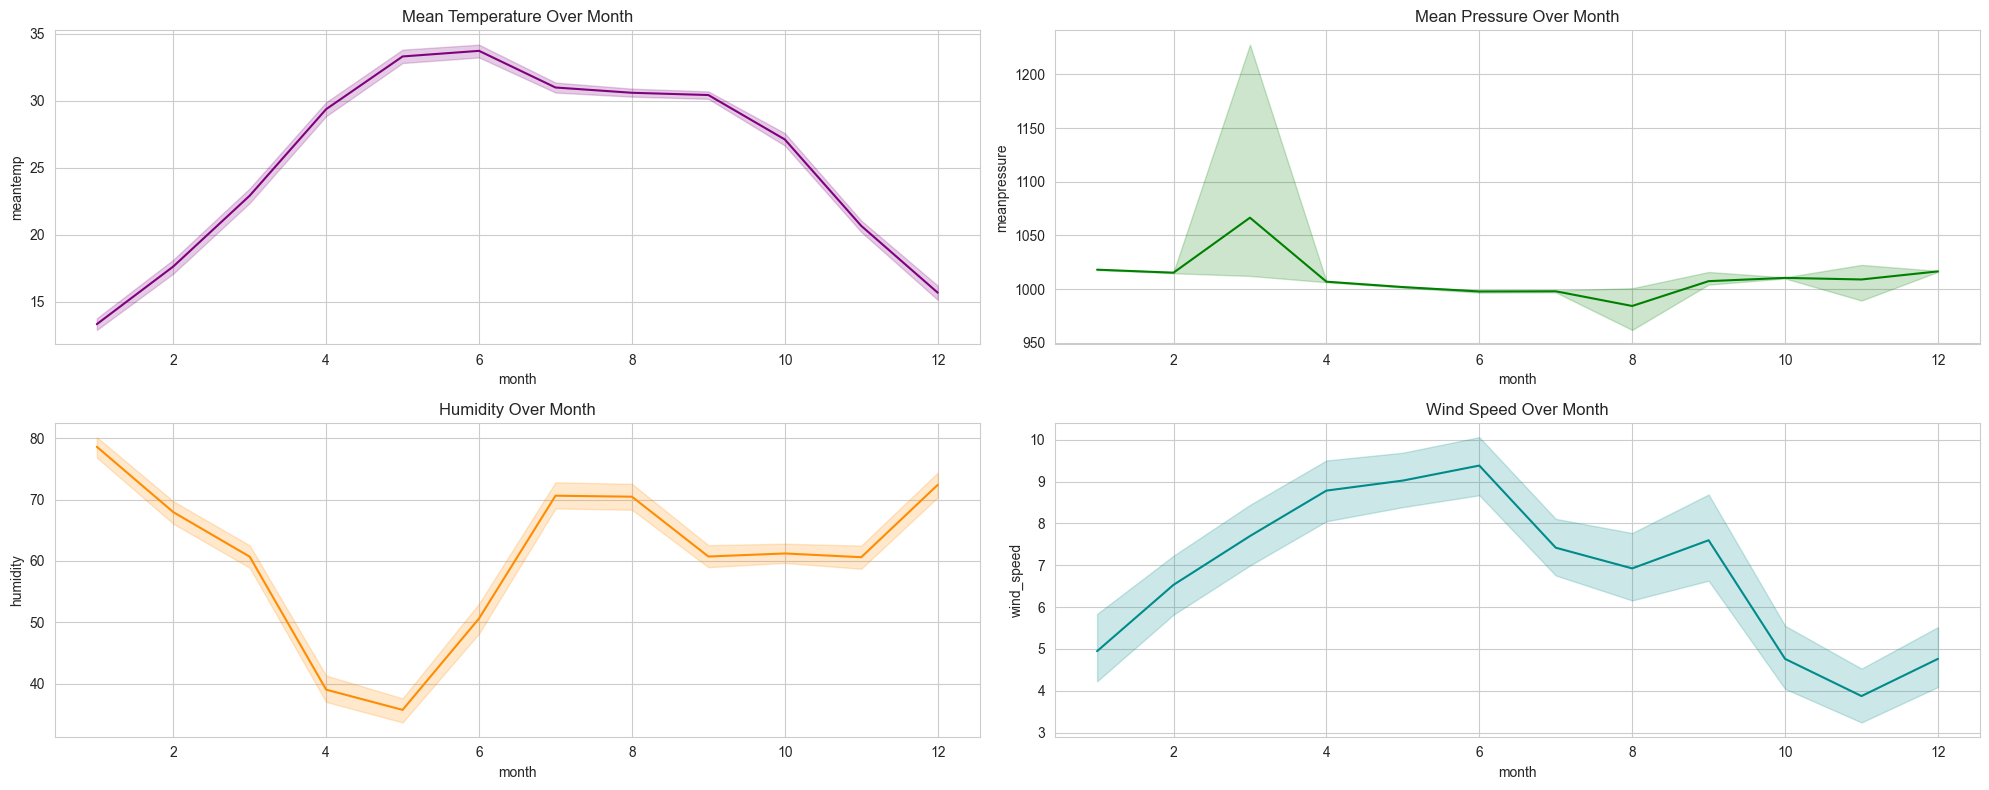

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

sns.set_style('darkgrid')

# Plot each parameter against the 'month'
sns.lineplot(x='month', y='meantemp', data=df, color='purple', ax=axes[0][0])
axes[0][0].set_title('Mean Temperature Over Month')

sns.lineplot(x='month', y='humidity', data=df, color='darkorange', ax=axes[1][0])
axes[1][0].set_title('Humidity Over Month')

sns.lineplot(x='month', y='meanpressure', data=df, color='green', ax=axes[0][1])
axes[0][1].set_title('Mean Pressure Over Month')

sns.lineplot(x='month', y='wind_speed', data=df, color='darkcyan', ax=axes[1][1])
axes[1][1].set_title('Wind Speed Over Month')

plt.tight_layout()
plt.show()


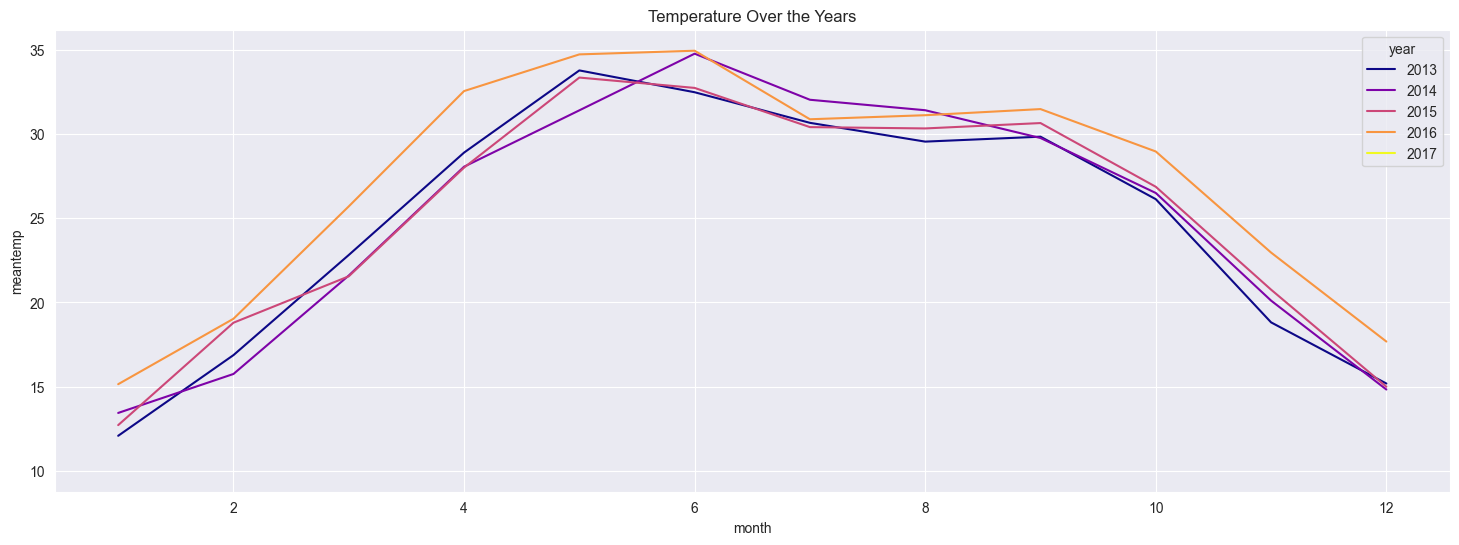

In [15]:
# Create a figure with the specified size
plt.figure(figsize=(18, 6))

sns.set_style('darkgrid')

plt.title("Temperature Over the Years")
sns.lineplot(data=df, x='month', y='meantemp', hue='year', palette='plasma', ci= None);

In [16]:
import plotly.graph_objects as go

# Function to create a heatmap trace for a given feature
def create_heatmap_trace(data, feature):
    heatmap_data = data.pivot_table(values=feature, index='year', columns='month', aggfunc='mean')
    heatmap_text = heatmap_data.round(2).astype(str).values

    heatmap = go.Heatmap(
        z=heatmap_data.values,
        x=heatmap_data.columns,
        y=heatmap_data.index,
        colorscale='thermal',
        text=heatmap_text,
        hoverinfo='text'
    )
    annotations = []
    for i in range(len(heatmap_data.index)):
        for j in range(len(heatmap_data.columns)):
            annotations.append(
                go.layout.Annotation(
                    x=heatmap_data.columns[j],
                    y=heatmap_data.index[i],
                    text=heatmap_text[i][j],
                    showarrow=False,
                    font=dict(color='white' if heatmap_data.values[i, j] < (heatmap_data.values.max() / 2) else 'black')
                )
            )

    return heatmap, annotations
# Create heatmap traces and annotations for each feature
features = ['meantemp', 'meanpressure', 'humidity', 'wind_speed']
titles = ['Monthly Average Temperature', 'Monthly Average Pressure', 'Monthly Average Humidity', 'Monthly Average Wind Speed']

heatmap_traces = []
annotations_list = []

for feature in features:
    heatmap, annotations = create_heatmap_trace(df, feature)
    heatmap_traces.append(heatmap)
    annotations_list.append(annotations)

# Initialize figure with all traces but only show the first one
fig = go.Figure(data=heatmap_traces)

# Set initial visibility
for i, trace in enumerate(fig.data):
    trace.visible = (i == 0)

fig.update_layout(
    title=titles[0],
    xaxis=dict(nticks=12, title='Month'),
    yaxis=dict(title='Year'),
    annotations=annotations_list[0]
)
# Create dropdown buttons for switching between heatmaps
dropdown_buttons = [
    dict(
        args=[{'visible': [j == i for j in range(len(features))]},
              {'annotations': annotations_list[i],
               'title': titles[i]}],
        label=title,
        method='update'
    )
    for i, title in enumerate(titles)
]

# Add dropdown menu to layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=dropdown_buttons,
            direction='down',
            showactive=True,
            x=1.15,  # Positioning the button to the right
            y=1.15  # Positioning the button at the top
        )
    ],
    xaxis=dict(title='Month'),
    yaxis=dict(title='Year')
)

fig.show()

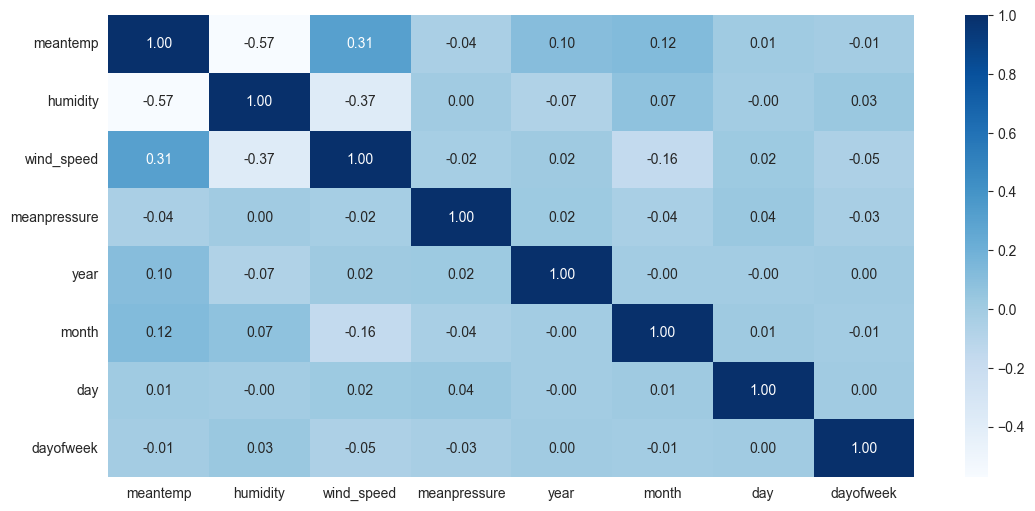

In [17]:
plt.figure(figsize=(13, 6))

sns.heatmap(df.select_dtypes('number').corr(), cmap='Blues', annot=True, fmt='.2f');

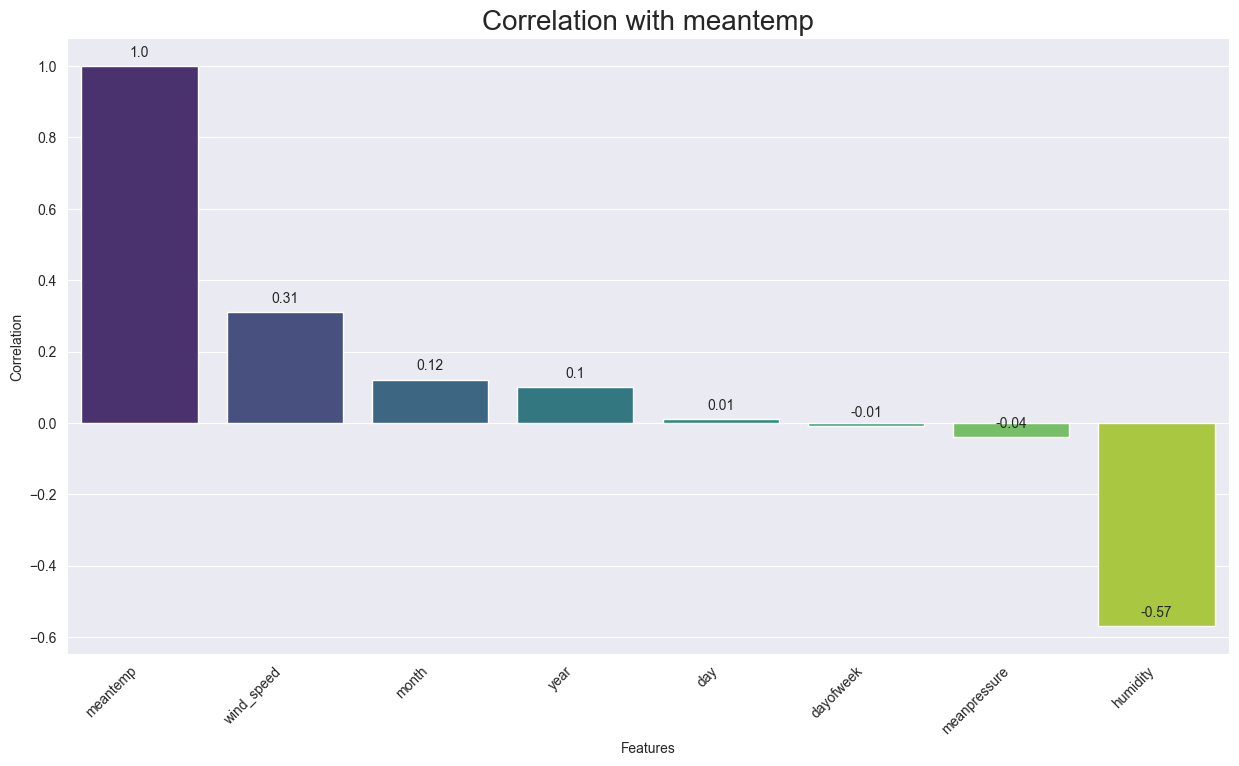

In [18]:
plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')

correlation_matrix = round(df.select_dtypes('number').corr(), 2)

correlation_with_trgt = correlation_matrix['meantemp'].sort_values(ascending=False)

ax = sns.barplot(x=correlation_with_trgt.index, y=correlation_with_trgt, palette='viridis')

plt.title('Correlation with meantemp', size= 20)
plt.xlabel('Features')
plt.ylabel('Correlation')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
# Box plots by Month

fig = px.box(df, x='month', y='meantemp', title='Monthly Distribution of Mean Temperatures', template='xgridoff_dark')
fig.show()

fig = px.box(df, x='month', y='humidity', title='Monthly Distribution of Mean Humidity', template='xgridoff_dark')
fig.show()

fig = px.box(df, x='month', y='wind_speed', title='Monthly Distribution of Mean wind_speed', template='xgridoff_dark')
fig.show()

fig = px.box(df, x='month', y='meanpressure', title='Monthly Distribution of Mean Pressure', template='xgridoff_dark')
fig.show()

In [20]:
# Increase the size of the figure
fig = px.scatter_matrix(df, 
                        dimensions=['meantemp', 'humidity', 'wind_speed', 'meanpressure'], 
                        title='Scatter Matrix of Weather Parameters')

# Update layout to increase figure size and add outlines to dots
fig.update_layout(
    width=1200,  # Width of the figure
    height=800,  # Height of the figure
    title_x=0.5,  # Title position
    margin=dict(l=50, r=50, t=50, b=50),  # Margin around the plot
    template='xgridoff_dark'
)

# Update marker properties to add outlines
fig.update_traces(marker=dict(line=dict(width=1, color='black')))  # Add outlines to dots

# Show the figure
fig.show()


In [21]:
# Create individual histogram plots with KDE lines and outlines for each feature
fig_meantemp = px.histogram(df, x='meantemp', marginal='rug', title='Histogram Mean Temperature')
fig_humidity = px.histogram(df, x='humidity', marginal='rug', title='Histogram for Humidity')
fig_wind_speed = px.histogram(df, x='wind_speed', marginal='rug', title='Histogram for Wind Speed')

# Update traces to add outlines to the bars
for fig in [fig_meantemp, fig_humidity, fig_wind_speed]:
    fig.update_traces(marker=dict(line=dict(width=1, color='black')))  # Add outlines to bars

# Create subplot layout
fig = go.Figure()

# Add traces to the subplot
fig.add_trace(fig_meantemp['data'][0])  # Add Mean Temperature histogram
fig.add_trace(fig_humidity['data'][0])  # Add Humidity histogram
fig.add_trace(fig_wind_speed['data'][0])  # Add Wind Speed histogram

# Define button list for toggling between plots
buttons = [
    dict(label='Mean Temperature', method='update', args=[{'visible': [True, False, False]}]),
    dict(label='Humidity', method='update', args=[{'visible': [False, True, False]}]),
    dict(label='Wind Speed', method='update', args=[{'visible': [False, False, True]}]),
]

# Add buttons to the figure
fig.update_layout(
    updatemenus=[dict(buttons=buttons, direction='down', showactive=True, x=1.0, y=1.15)],
    title='Histograms with Outlines',
    template='xgridoff_dark'
)

# Show the figure
fig.show()

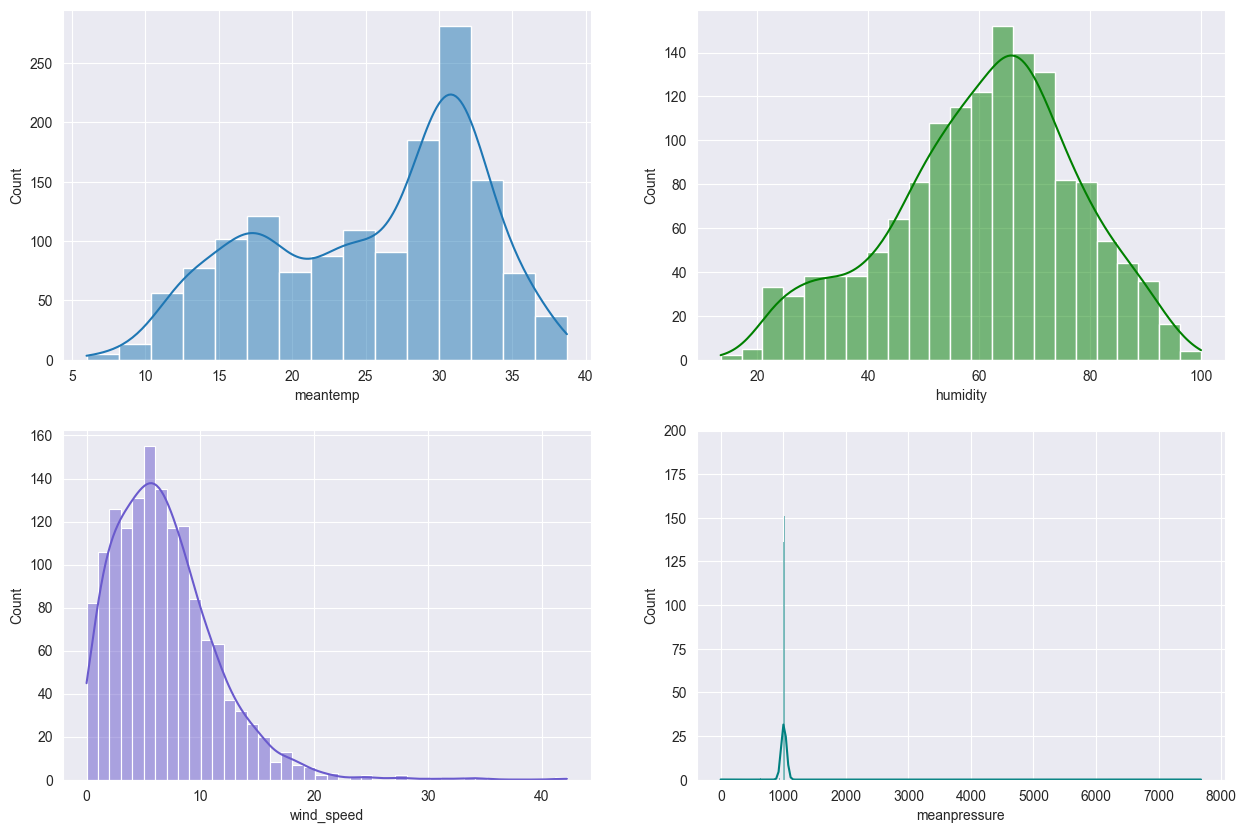

In [22]:
# Reset seaborn style to default
sns.set_style('darkgrid')

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plot histograms with KDE
sns.histplot(data=df, x="meantemp", ax=ax[0][0], kde=True)

sns.histplot(data=df, x="humidity", ax=ax[0][1], kde=True, color='green')

sns.histplot(data=df, x="wind_speed", ax=ax[1][0], kde=True, color='slateblue')

sns.histplot(data=df, x="meanpressure", ax=ax[1][1], kde=True, color='teal')

# Show the plot
plt.show()

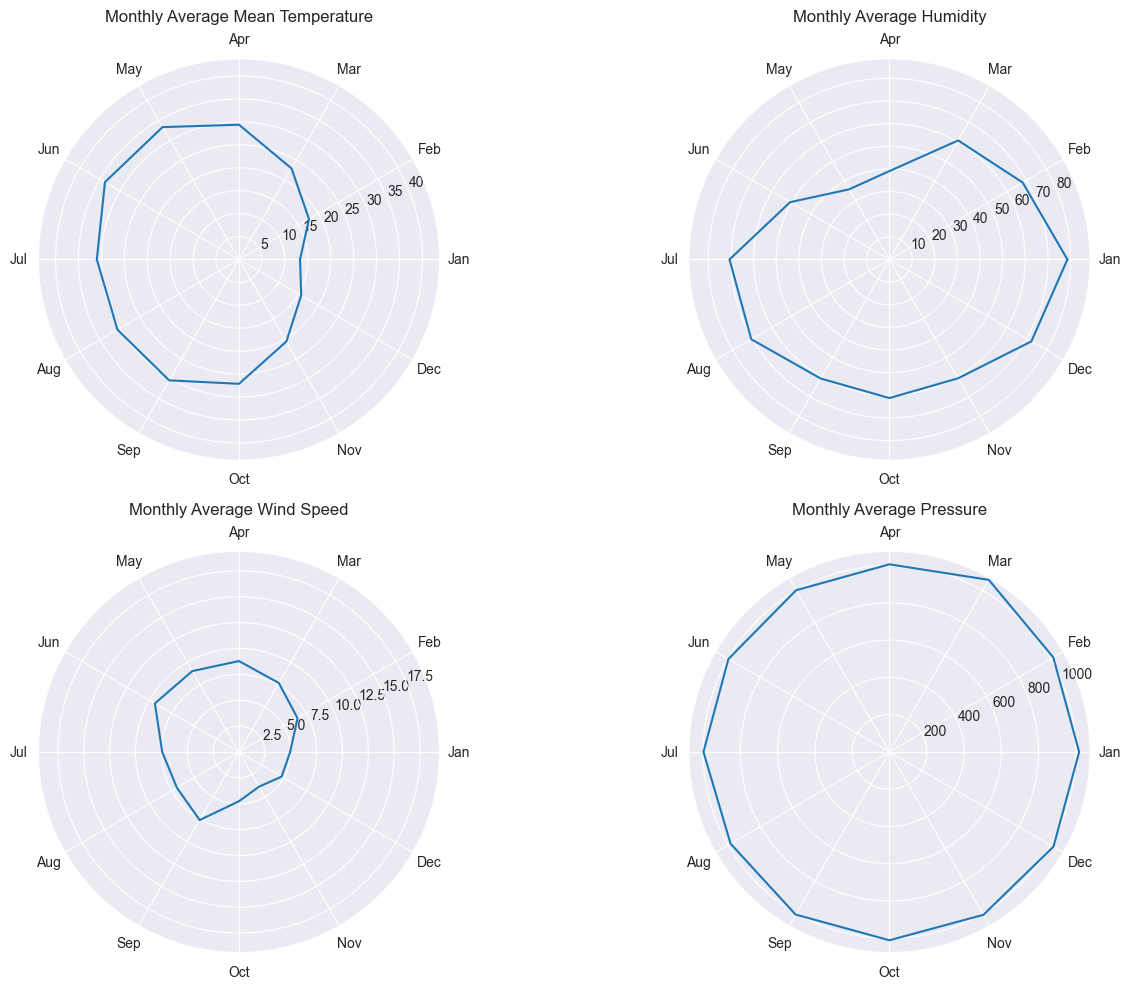

In [23]:
sns.set_style('darkgrid')

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(14, 10))

# List of parameters and their titles
parameters = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
titles = ['Monthly Average Mean Temperature', 'Monthly Average Humidity', 
          'Monthly Average Wind Speed', 'Monthly Average Pressure']

for ax, param, title in zip(axs.flatten(), parameters, titles):
    # Grouping the data by month, calculating the average mean value for each month 
    monthly_average = df.groupby('month')[param].mean()
    
    # Polar Plot theta (angle) and radii (length) settings
    theta = np.linspace(0, 2 * np.pi, len(monthly_average), endpoint=False)
    radii = monthly_average.values
    
    # Extend theta and radii to connect the circle
    theta = np.append(theta, theta[0])
    radii = np.append(radii, radii[0])
    
    # Polar Plot
    ax.plot(theta, radii)
    ax.set_title(title, va='bottom')
    ax.set_xticks(theta[:-1])
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                        'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.set_ylim(0, radii.max() + 10)
    
plt.tight_layout()
plt.show()


# mean temprature is higher in summer

In [24]:
# to prevent out of memory error just in case

import gc

del fig

In [25]:
gc.collect()

110

In [26]:
df = df[['meantemp', 'humidity', 'wind_speed']]
df.head()

meantemp  humidity  wind_speed
date                                      
2013-01-01    10.000    84.500       0.000
2013-01-02     7.400    92.000       2.980
2013-01-03     7.167    87.000       4.633
2013-01-04     8.667    71.333       1.233
2013-01-05     6.000    86.833       3.700

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meantemp    1462 non-null   float64
 1   humidity    1462 non-null   float64
 2   wind_speed  1462 non-null   float64
dtypes: float64(3)
memory usage: 45.7 KB


In [28]:
# Creating a new Dataframe for ARIMA-SARIMA Models
df1 = df.copy()
df1

meantemp  humidity  wind_speed
date                                      
2013-01-01    10.000    84.500       0.000
2013-01-02     7.400    92.000       2.980
2013-01-03     7.167    87.000       4.633
2013-01-04     8.667    71.333       1.233
2013-01-05     6.000    86.833       3.700
...              ...       ...         ...
2016-12-28    17.217    68.043       3.548
2016-12-29    15.238    87.857       6.000
2016-12-30    14.095    89.667       6.267
2016-12-31    15.053    87.000       7.325
2017-01-01    10.000   100.000       0.000

[1462 rows x 3 columns]

ARIMA : Non-seasonal Autoregressive Integrated Moving Averages

SARIMA : Seasonal ARIMA

SARIMAX : Seasonal ARIMA with exogenous variables

If a time series, has seasonal patterns, then we need to add seasonal terms and it becomes SARIMA, short for Seasonal ARIMA.

Steps for building ARIMA-SARIMA models:
1. Check Stationarity:
Verify the stationarity of each series using tests like ADF (Augmented Dickey-Fuller) and KPSS (Kwiatkowski-Phillips-Schmidt-Shin). Display with ACF and PACF plots.

2. Make Series Stationary:
Apply transformations to make the target and exogenous variables stationary if needed. Common methods include differencing and log transformations.

3. Model the Relationship:
Use the stationary series in your ARIMA or SARIMA model.

For ARIMA (AutoRegressive Integrated Moving Average) and SARIMA (Seasonal AutoRegressive Integrated Moving Average) models, it is essential to make the time series data stationary before fitting the model. These models assume that the time series data is stationary, meaning that its statistical properties such as mean, variance, and autocorrelation structure do not change over time. If the data is non-stationary, it can lead to biased parameter estimates and unreliable forecasts.

To make the data stationary, you typically need to remove trends and seasonality. This can be done through techniques like taking differences (for removing trends) and seasonal differencing (for removing seasonality). Once the data is stationary, you can then fit the ARIMA or SARIMA model to the transformed data.

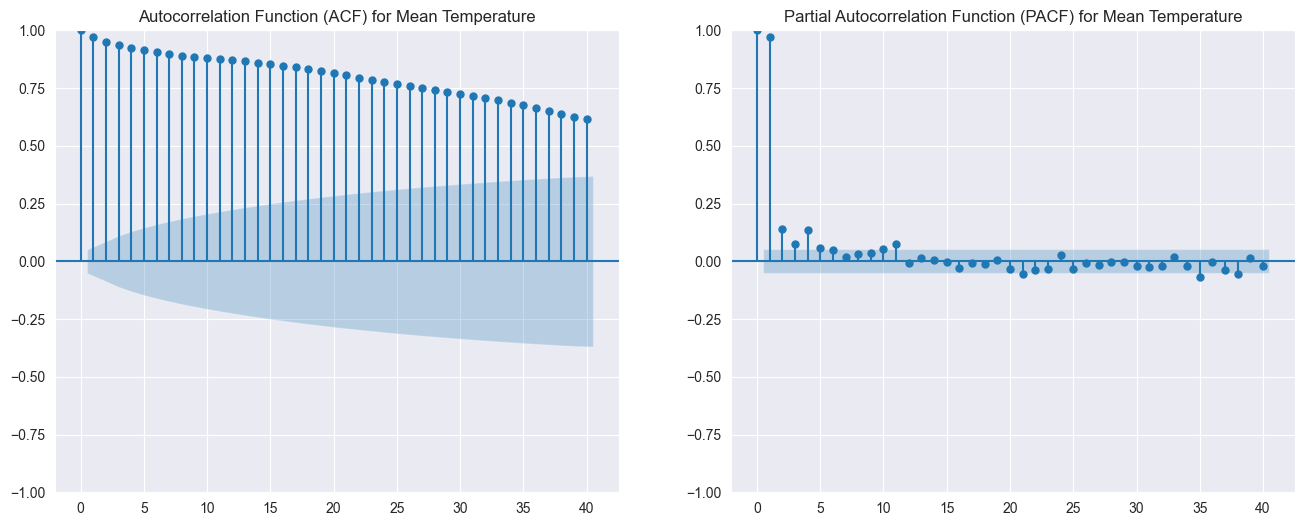

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot ACF
plot_acf(df1['meantemp'], ax=axes[0], lags=40, title='Autocorrelation Function (ACF) for Mean Temperature')

# Plot PACF
plot_pacf(df1['meantemp'], ax=axes[1], lags=40, title='Partial Autocorrelation Function (PACF) for Mean Temperature')

plt.show()

In [30]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss

def check_stationarity(series):
    print(f'\n___________________Checking Stationarity for: {series.name}___________________\n')
    
    # ADF Test
    adf_test = adfuller(series.values)
    print('ADF Test:\n')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    if (adf_test[1] <= 0.05) & (adf_test[4]['5%'] > adf_test[0]):
        print("\u001b[32mSeries is Stationary (ADF Test)\u001b[0m")
    else:
        print("\x1b[31mSeries is Non-stationary (ADF Test)\x1b[0m")
    
    print('\n' + '-'*50 + '\n')
    
    # KPSS Test
    kpss_test = kpss(series.values, regression='c', nlags='auto')
    print('KPSS Test:\n')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))

    if kpss_test[1] > 0.05:
        print("\u001b[32mSeries is Stationary (KPSS Test)\u001b[0m")
    else:
        print("\x1b[31mSeries is Non-stationary (KPSS Test)\x1b[0m")

In [31]:
# Check initial stationarity for each feature

check_stationarity(df1['meantemp'])  # target is non stationary!!
check_stationarity(df1['humidity'])


___________________Checking Stationarity for: meantemp___________________

ADF Test:

ADF Statistic: -2.021069
p-value: 0.277412
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Series is Non-stationary (ADF Test)

--------------------------------------------------

KPSS Test:

KPSS Statistic: 0.187864
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)

___________________Checking Stationarity for: humidity___________________

ADF Test:

ADF Statistic: -3.675577
p-value: 0.004470
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Series is Stationary (ADF Test)

--------------------------------------------------

KPSS Test:

KPSS Statistic: 0.091737
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)


C:\Users\HP\AppData\Local\Temp\ipykernel_23184\2808105107.py:24: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\HP\AppData\Local\Temp\ipykernel_23184\2808105107.py:24: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [32]:
check_stationarity(df1['meantemp'])

df1['meantemp_diff'] = df1['meantemp'].diff().fillna(0)  # diff() default is 1st degree differencing 

print('\n\n############################### After Differencing ###############################\n\n')
check_stationarity(df1['meantemp_diff']);


___________________Checking Stationarity for: meantemp___________________

ADF Test:

ADF Statistic: -2.021069
p-value: 0.277412
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Series is Non-stationary (ADF Test)

--------------------------------------------------

KPSS Test:

KPSS Statistic: 0.187864
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)


############################### After Differencing ###############################



___________________Checking Stationarity for: meantemp_diff___________________

ADF Test:

ADF Statistic: -16.294070
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Series is Stationary (ADF Test)

--------------------------------------------------

KPSS Test:

KPSS Statistic: 0.189493
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)


C:\Users\HP\AppData\Local\Temp\ipykernel_23184\2808105107.py:24: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\HP\AppData\Local\Temp\ipykernel_23184\2808105107.py:24: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




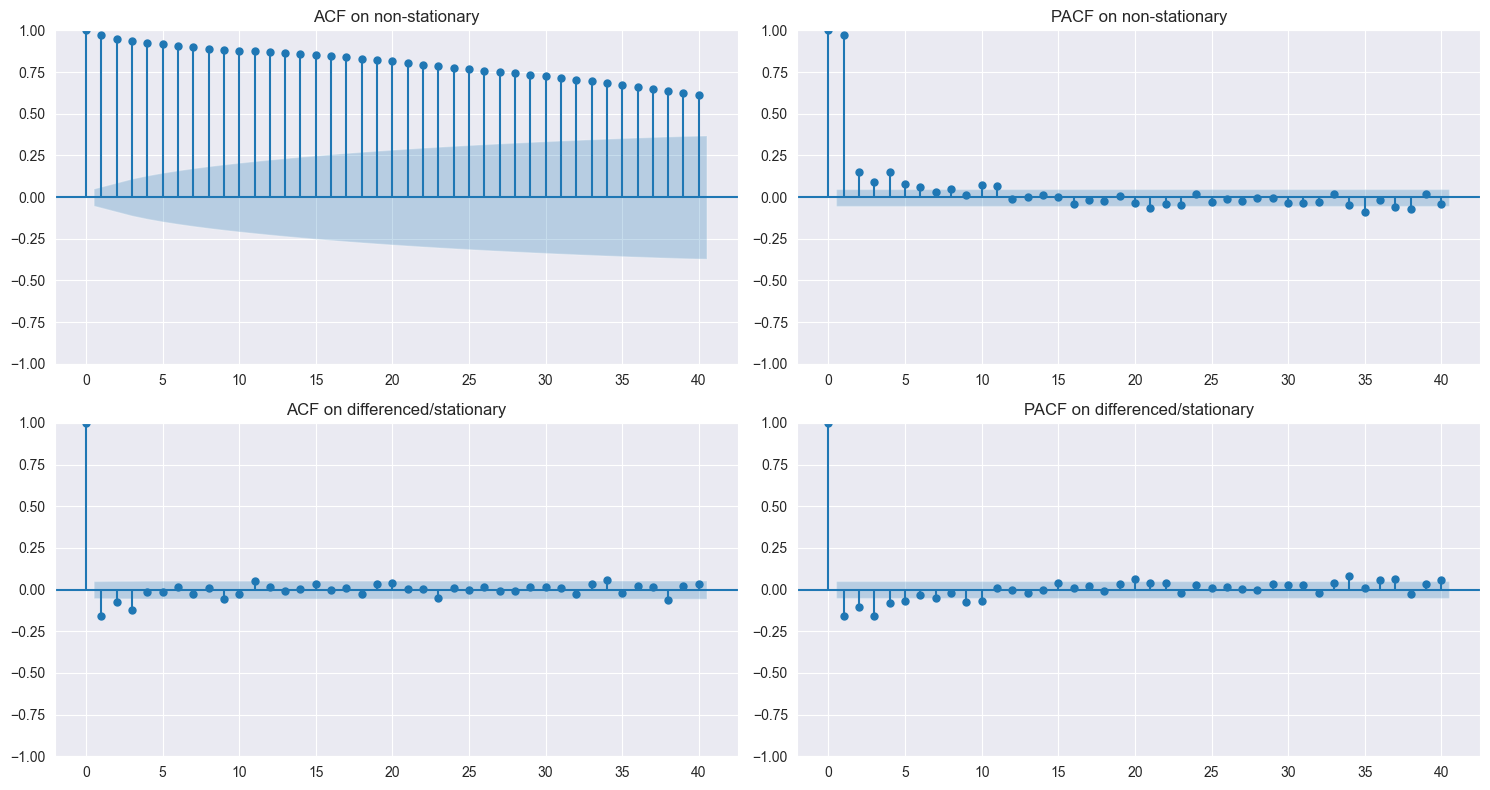

In [33]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

plot_acf(df1['meantemp'], lags=40, ax=ax[0, 0], title='ACF on non-stationary')
plot_pacf(df1['meantemp'], lags=40, ax=ax[0, 1], method='ols', title='PACF on non-stationary')

plot_acf(df1['meantemp_diff'], lags=40, ax=ax[1, 0], title='ACF on differenced/stationary')
plot_pacf(df1['meantemp_diff'], lags=40, ax=ax[1, 1], method='ols', title='PACF on differenced/stationary')

plt.tight_layout()
plt.show()

In [34]:
# Split the data into training and testing sets
train_size = int(len(df1) * 0.8)
train, test = df1.iloc[:train_size], df1.iloc[train_size:]

In [35]:
display(f'Train shape: {train.shape}')
display(train.head())

display(f'Test shape: {test.shape}')
test.head()

'Train shape: (1169, 4)'

meantemp  humidity  wind_speed  meantemp_diff
date                                                     
2013-01-01    10.000    84.500       0.000          0.000
2013-01-02     7.400    92.000       2.980         -2.600
2013-01-03     7.167    87.000       4.633         -0.233
2013-01-04     8.667    71.333       1.233          1.500
2013-01-05     6.000    86.833       3.700         -2.667

'Test shape: (293, 4)'

meantemp  humidity  wind_speed  meantemp_diff
date                                                     
2016-03-15    24.067    58.933       8.647          1.692
2016-03-16    23.938    53.750      10.881         -0.129
2016-03-17    26.312    50.312       6.844          2.375
2016-03-18    26.188    61.250       6.713         -0.125
2016-03-19    26.786    61.857       3.579          0.598

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Test MSE: 65.649


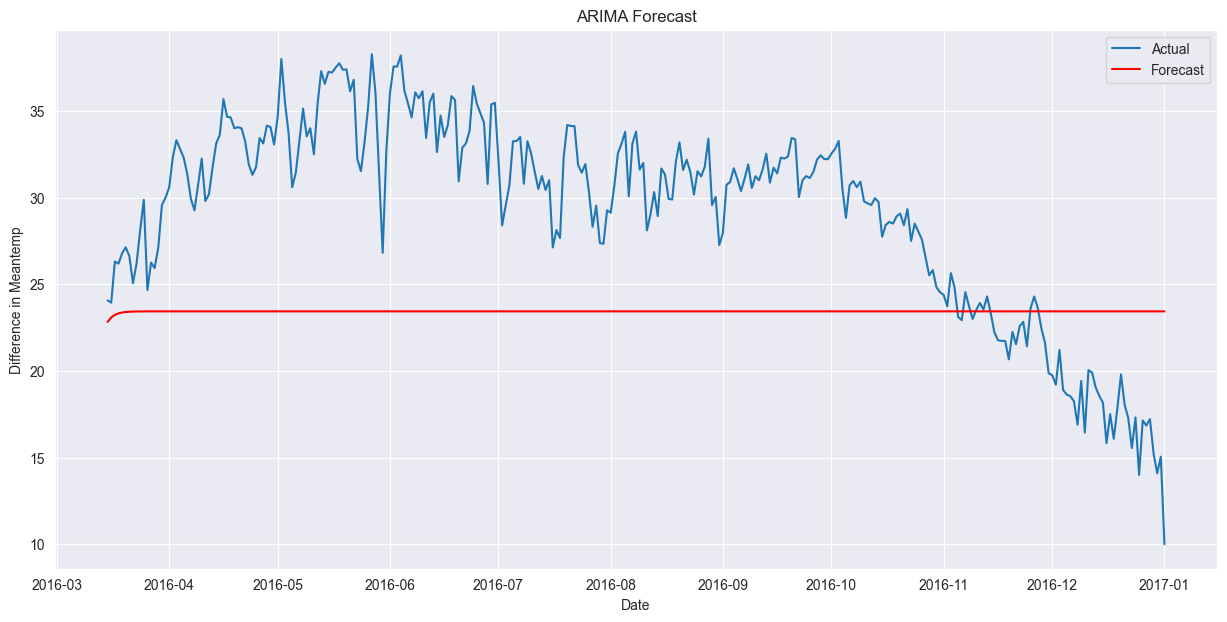

In [36]:
# ARIMA

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Fit the ARIMA model
arima_model = ARIMA(train['meantemp'], order=(1,1,1))  # ARIMA(p,d,q)
arima_model_fit = arima_model.fit()

# Make predictions
arima_pred = arima_model_fit.forecast(steps=len(test))

# Calculate error
error = mean_squared_error(test['meantemp'], arima_pred)
print('Test MSE: %.3f' % error)

# Plot the results
plt.plot(test.index, test['meantemp'], label='Actual')
plt.plot(test.index, arima_pred, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Difference in Meantemp')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Test MSE: 42.81635101985785
Test R²: -0.337


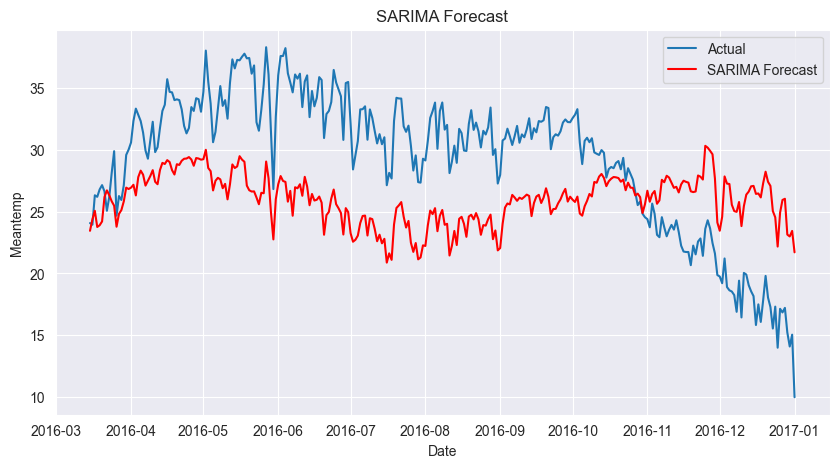

In [37]:
# SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model parameters
order = (1, 1, 6)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 7)  # Seasonal order (P, D, Q, S)  

# Fit the SARIMA model
sarima_model = SARIMAX(endog=train['meantemp'], exog=train[['humidity', 'wind_speed']],
                       order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Make predictions
sarima_pred = sarima_model_fit.predict(start=test.index[0], end=test.index[-1],
                                            exog=test[['humidity', 'wind_speed']])

# Calculate error
mse = mean_squared_error(test['meantemp'], sarima_pred)
r2 = r2_score(test['meantemp'], sarima_pred)
print('Test MSE:', mse)
print('Test R²: %.3f' % r2)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(test.index, test['meantemp'], label='Actual')
plt.plot(test.index, sarima_pred, color='red', label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Test MSE: 23.102389796856198
Test R²: 0.278


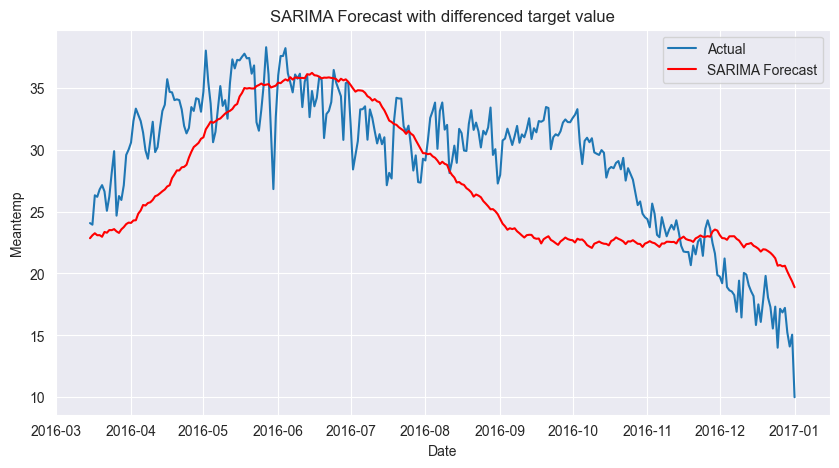

In [38]:
# SARIMAX with differenced target (will not be compared with other models)

# Fit the SARIMA model
sarima_model = SARIMAX(endog=train['meantemp_diff'], exog=train[['humidity', 'wind_speed']],
                       order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Make predictions
sarima_pred_diff = sarima_model_fit.predict(start=test.index[0], end=test.index[-1],
                                            exog=test[['humidity', 'wind_speed']])

# Convert differenced predictions back to the original scale
# Start the conversion from the last known original value in the training set
last_original_value = train['meantemp'].iloc[-1]
sarima_pred = sarima_pred_diff.cumsum() + last_original_value

# Calculate error
mse = mean_squared_error(test['meantemp'], sarima_pred)
r2 = r2_score(test['meantemp'], sarima_pred)
print('Test MSE:', mse)
print('Test R²: %.3f' % r2)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(test.index, test['meantemp'], label='Actual')
plt.plot(test.index, sarima_pred, color='red', label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('SARIMA Forecast with differenced target value')
plt.legend()
plt.show()

In [39]:
monthly_df = df1.resample('M').mean()

# Split the data into training and testing sets
train_size = int(len(monthly_df) * 0.8)
m_train, m_test = monthly_df.iloc[:train_size], monthly_df.iloc[train_size:]

Test MSE: 64.547


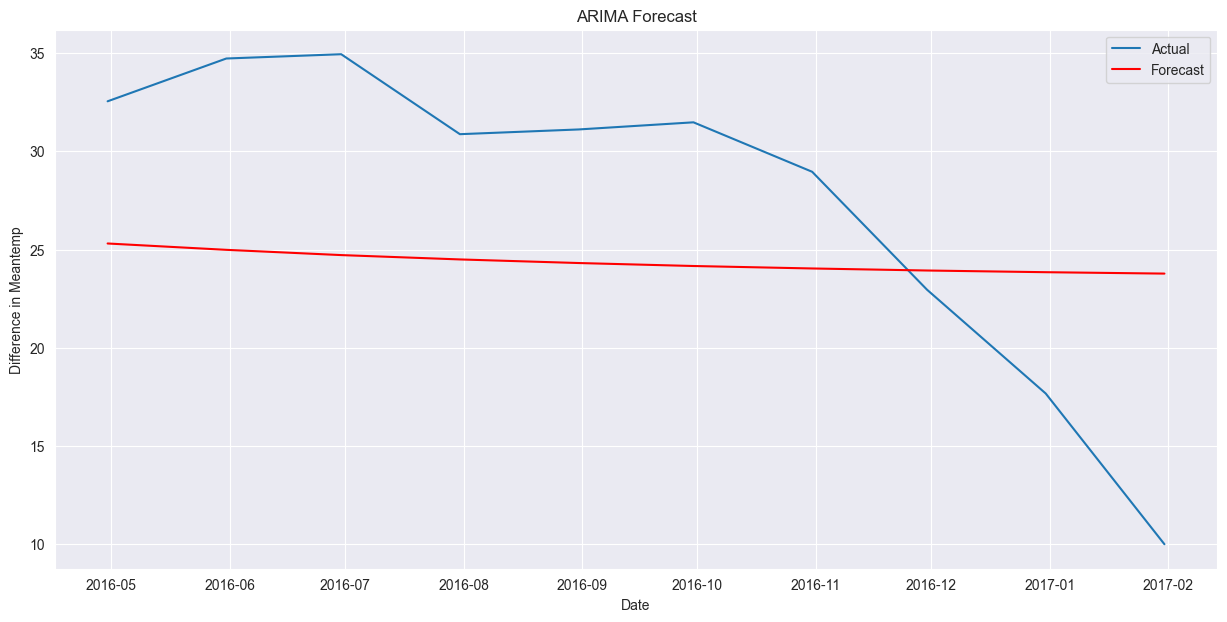

In [40]:
# ARIMA

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Fit the ARIMA model
arima_model = ARIMA(m_train['meantemp'], order=(1,0,0))  # ARIMA(p,d,q)
arima_model_fit = arima_model.fit()

# Make predictions
arima_pred_m = arima_model_fit.forecast(steps=len(m_test))

# Calculate error
error = mean_squared_error(m_test['meantemp'], arima_pred_m)
print('Test MSE: %.3f' % error)

# Plot the results
plt.plot(m_test.index, m_test['meantemp'], label='Actual')
plt.plot(m_test.index, arima_pred_m, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Difference in Meantemp')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

Test MSE: 3.7680480221292356
Test R²: 0.937


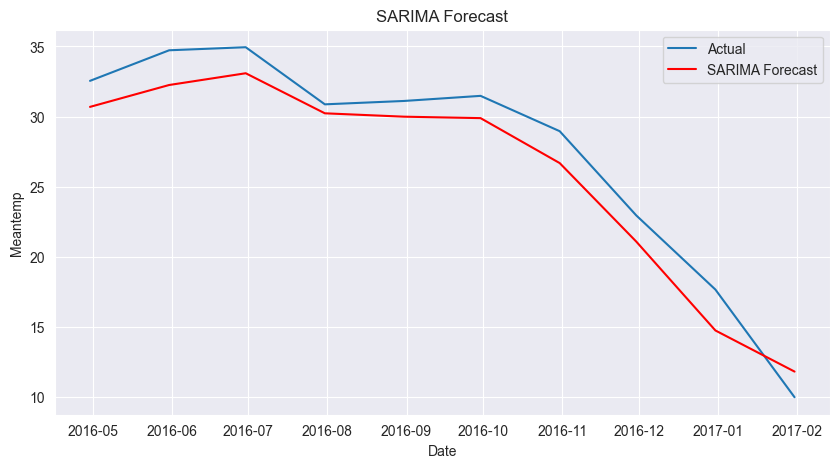

In [41]:
# SARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model parameters
order = (1, 0, 0)  # Non-seasonal order (p, d, q)
seasonal_order = (2, 1, 1, 12)  # Seasonal order (P, D, Q, S)  

# Fit the SARIMA model
sarima_model = SARIMAX(endog=m_train['meantemp'], exog=m_train[['humidity', 'wind_speed']],
                       order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Make predictions
sarima_pred_m = sarima_model_fit.predict(start=m_test.index[0], end=m_test.index[-1],
                                            exog=m_test[['humidity', 'wind_speed']])

# Calculate error
mse = mean_squared_error(m_test['meantemp'], sarima_pred_m)
r2 = r2_score(m_test['meantemp'], sarima_pred_m)
print('Test MSE:', mse)
print('Test R²: %.3f' % r2)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(m_test.index, m_test['meantemp'], label='Actual')
plt.plot(m_test.index, sarima_pred_m, color='red', label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=104.420, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=100.592, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=104.176, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=106.408, Time=0.02 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=100.462, Time=0.06 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(

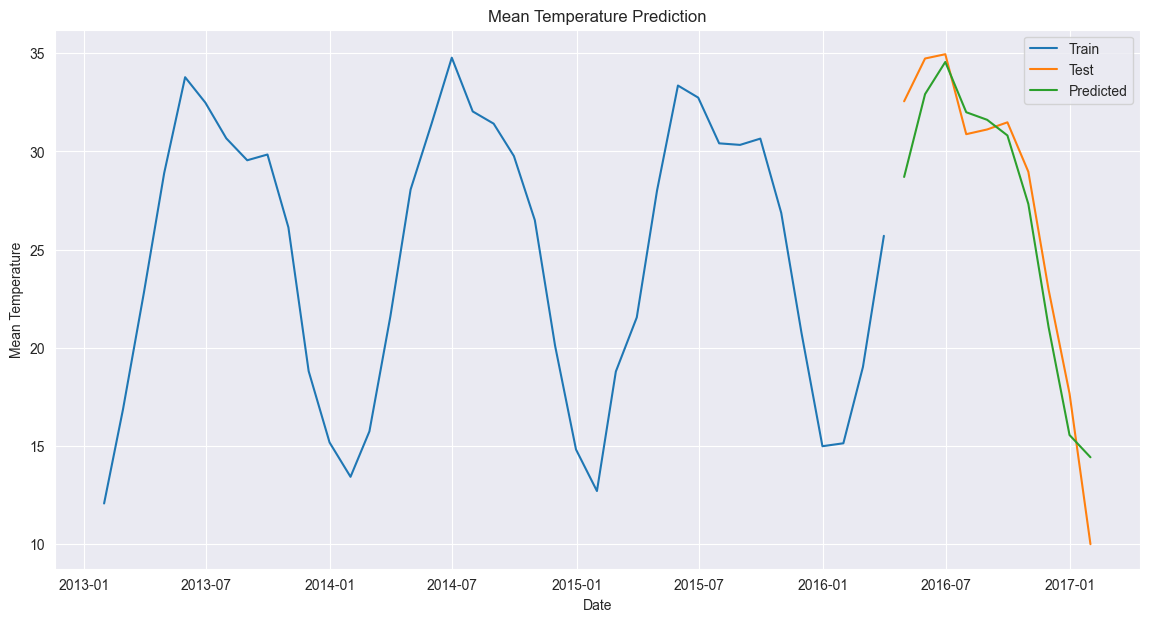

In [43]:
from pmdarima import auto_arima

# Fit the model on the training data with optimized settings for monthly seasonality
model = auto_arima(
    m_train['meantemp'], 
    seasonal=True, 
    m=12,
    max_p=7, 
    max_d=1, 
    max_q=3, 
    max_P=3, 
    max_D=1, 
    max_Q=2,
    trace=True,    # To print the progress of the fitting
    error_action='ignore',  # Ignore potential errors
    suppress_warnings=True,  # Suppress warnings
    n_jobs=-1  # Use all available CPU cores
)

# Print model summary
print(model.summary())

# Make predictions
n_periods = len(m_test)
auto_arima_pred = model.predict(n_periods=n_periods)

# Calculate R^2 and RMSE
r2 = r2_score(m_test['meantemp'], auto_arima_pred)
rmse = np.sqrt(mean_squared_error(m_test['meantemp'], auto_arima_pred))

print(f'R^2 score: {r2}')
print(f'RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(m_train.index, m_train['meantemp'], label='Train')
plt.plot(m_test.index, m_test['meantemp'], label='Test')
plt.plot(m_test.index, auto_arima_pred, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Prediction')
plt.show()

In [44]:
df.head()

meantemp  humidity  wind_speed
date                                      
2013-01-01    10.000    84.500       0.000
2013-01-02     7.400    92.000       2.980
2013-01-03     7.167    87.000       4.633
2013-01-04     8.667    71.333       1.233
2013-01-05     6.000    86.833       3.700

19:58:43 - cmdstanpy - INFO - Chain [1] start processing
19:58:44 - cmdstanpy - INFO - Chain [1] done processing


Test MSE: 7.629
Test R²: 0.762


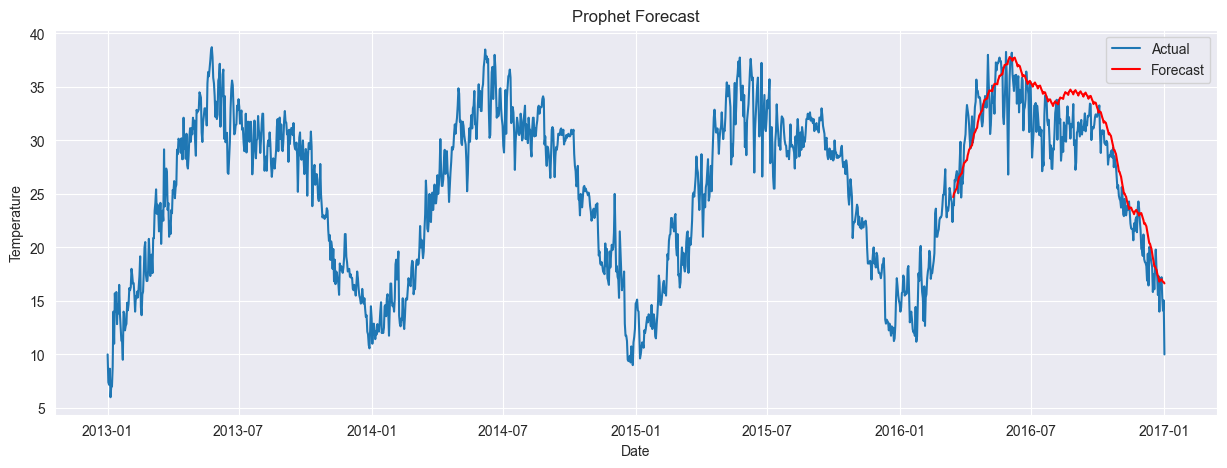

In [46]:
from prophet import Prophet

# Rename columns for Prophet
df_prophet = df.reset_index().rename(columns={'date': 'ds', 'meantemp': 'y'})

# Split the data into training and testing sets
train_size = int(len(df_prophet) * 0.8)
p_train, p_test = df_prophet.iloc[:train_size], df_prophet.iloc[train_size:]

# Initialize and fit the Prophet model with additional features
prop_model = Prophet()

prop_model.fit(p_train)

# Make future dataframe and include additional features
future = prop_model.make_future_dataframe(periods=len(p_test), freq='D')

# Make predictions
forecast = prop_model.predict(future)

# Extract the forecasted values for the test period
predicted = forecast[['ds', 'yhat']].set_index('ds').loc[p_test['ds']]

# Calculate error and R²
mse = mean_squared_error(p_test['y'], predicted['yhat'])
r2 = r2_score(p_test['y'], predicted['yhat'])
print('Test MSE: %.3f' % mse)
print('Test R²: %.3f' % r2)

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual')
plt.plot(predicted.index, predicted['yhat'], color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prophet Forecast')
plt.legend()
plt.show()

19:59:36 - cmdstanpy - INFO - Chain [1] start processing
19:59:36 - cmdstanpy - INFO - Chain [1] done processing


Test MSE: 3.043
Test R²: 0.905


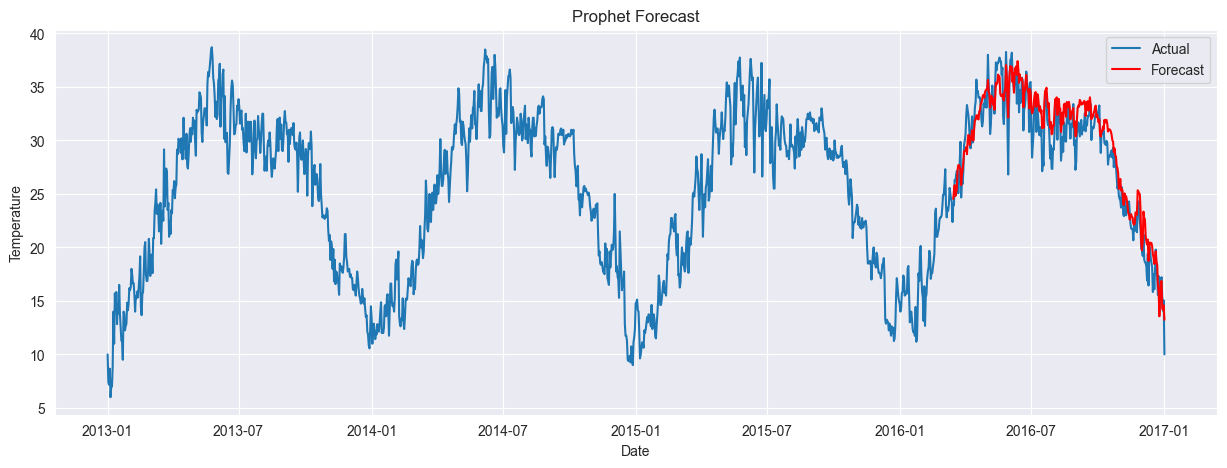

In [47]:
# Rename columns for Prophet
df_prophet = df.reset_index().rename(columns={'date': 'ds', 'meantemp': 'y'})

# Add additional features
df_prophet['humidity'] = df['humidity'].values
df_prophet['wind_speed'] = df['wind_speed'].values

# Split the data into training and testing sets
train_size = int(len(df_prophet) * 0.8)
p_train, p_test = df_prophet.iloc[:train_size], df_prophet.iloc[train_size:]


# Initialize and fit the Prophet model with additional features
prop_model = Prophet()
prop_model.add_regressor('humidity')
prop_model.add_regressor('wind_speed')

prop_model.fit(p_train)


# Make future dataframe and include additional features
future = prop_model.make_future_dataframe(periods=len(p_test), freq='D')
future['humidity'] = df['humidity'].values
future['wind_speed'] = df['wind_speed'].values

# Make predictions
forecast = prop_model.predict(future)

# Extract the forecasted values for the test period
predicted = forecast[['ds', 'yhat']].set_index('ds').loc[p_test['ds']]


# Calculate error and R²
mse = mean_squared_error(p_test['y'], predicted['yhat'])
r2 = r2_score(p_test['y'], predicted['yhat'])
print('Test MSE: %.3f' % mse)
print('Test R²: %.3f' % r2)

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual')
plt.plot(predicted.index, predicted['yhat'], color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prophet Forecast')
plt.legend()
plt.show()

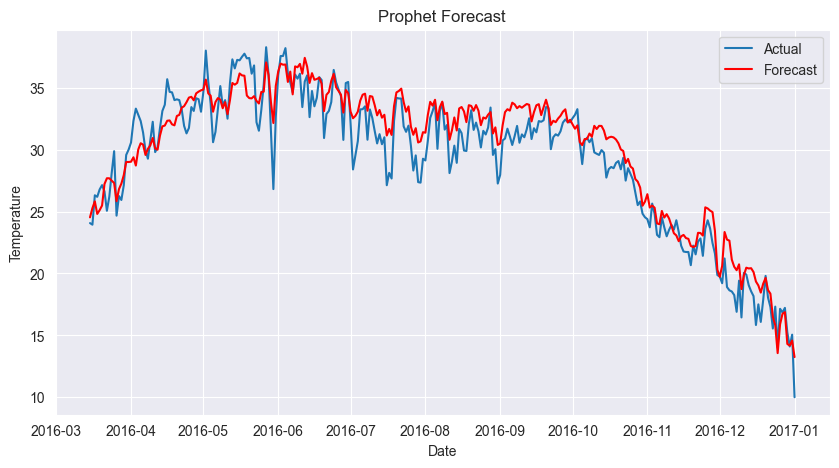

In [48]:
# Looking closer to the results

plt.figure(figsize=(10, 5))
plt.plot(p_test['ds'], p_test['y'], label='Actual')
plt.plot(predicted.index, predicted['yhat'], color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prophet Forecast')
plt.legend()
plt.show()

In [49]:
display(df_prophet.head()) # actual data

display(predicted.head()) # predicted values of p_test

ds      y  humidity  wind_speed
0 2013-01-01 10.000    84.500       0.000
1 2013-01-02  7.400    92.000       2.980
2 2013-01-03  7.167    87.000       4.633
3 2013-01-04  8.667    71.333       1.233
4 2013-01-05  6.000    86.833       3.700

yhat
ds               
2016-03-15 24.531
2016-03-16 25.273
2016-03-17 25.821
2016-03-18 24.806
2016-03-19 25.112

In [50]:
forecast.head(3)  # forecast data

ds  trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2013-01-01 23.918       8.262      12.537       23.918       23.918   
1 2013-01-02 23.925       7.470      11.829       23.925       23.925   
2 2013-01-03 23.933       7.881      12.060       23.933       23.933   

   additive_terms  additive_terms_lower  additive_terms_upper  \
0         -13.521               -13.521               -13.521   
1         -14.371               -14.371               -14.371   
2         -13.937               -13.937               -13.937   

   extra_regressors_additive  extra_regressors_additive_lower  \
0                     -2.370                           -2.370   
1                     -3.350                           -3.350   
2                     -2.833                           -2.833   

   extra_regressors_additive_upper  humidity  humidity_lower  humidity_upper  \
0                           -2.370    -2.618          -2.618          -2.618   
1                           -3.350    -3.486          -3.486          -3.486   
2                           -2.833    -2.908          -2.908          -2.908   

   weekly  weekly_lower  weekly_upper  wind_speed  wind_speed_lower  \
0   0.060         0.060         0.060       0.249             0.249   
1   0.101         0.101         0.101       0.136             0.136   
2  -0.086        -0.086        -0.086       0.074             0.074   

   wind_speed_upper  yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0             0.249 -11.211       -11.211       -11.211                 0.000   
1             0.136 -11.122       -11.122       -11.122                 0.000   
2             0.074 -11.017       -11.017       -11.017                 0.000   

   multiplicative_terms_lower  multiplicative_terms_upper   yhat  
0                       0.000                       0.000 10.398  
1                       0.000                       0.000  9.554  
2                       0.000                       0.000  9.996

In [51]:
# Adding the actual temprature values to the forecast data

forecast['Actual_temp'] = df_prophet['y']
forecast.head(3)

ds  trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2013-01-01 23.918       8.262      12.537       23.918       23.918   
1 2013-01-02 23.925       7.470      11.829       23.925       23.925   
2 2013-01-03 23.933       7.881      12.060       23.933       23.933   

   additive_terms  additive_terms_lower  additive_terms_upper  \
0         -13.521               -13.521               -13.521   
1         -14.371               -14.371               -14.371   
2         -13.937               -13.937               -13.937   

   extra_regressors_additive  extra_regressors_additive_lower  \
0                     -2.370                           -2.370   
1                     -3.350                           -3.350   
2                     -2.833                           -2.833   

   extra_regressors_additive_upper  humidity  humidity_lower  humidity_upper  \
0                           -2.370    -2.618          -2.618          -2.618   
1                           -3.350    -3.486          -3.486          -3.486   
2                           -2.833    -2.908          -2.908          -2.908   

   weekly  weekly_lower  weekly_upper  wind_speed  wind_speed_lower  \
0   0.060         0.060         0.060       0.249             0.249   
1   0.101         0.101         0.101       0.136             0.136   
2  -0.086        -0.086        -0.086       0.074             0.074   

   wind_speed_upper  yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0             0.249 -11.211       -11.211       -11.211                 0.000   
1             0.136 -11.122       -11.122       -11.122                 0.000   
2             0.074 -11.017       -11.017       -11.017                 0.000   

   multiplicative_terms_lower  multiplicative_terms_upper   yhat  Actual_temp  
0                       0.000                       0.000 10.398       10.000  
1                       0.000                       0.000  9.554        7.400  
2                       0.000                       0.000  9.996        7.167

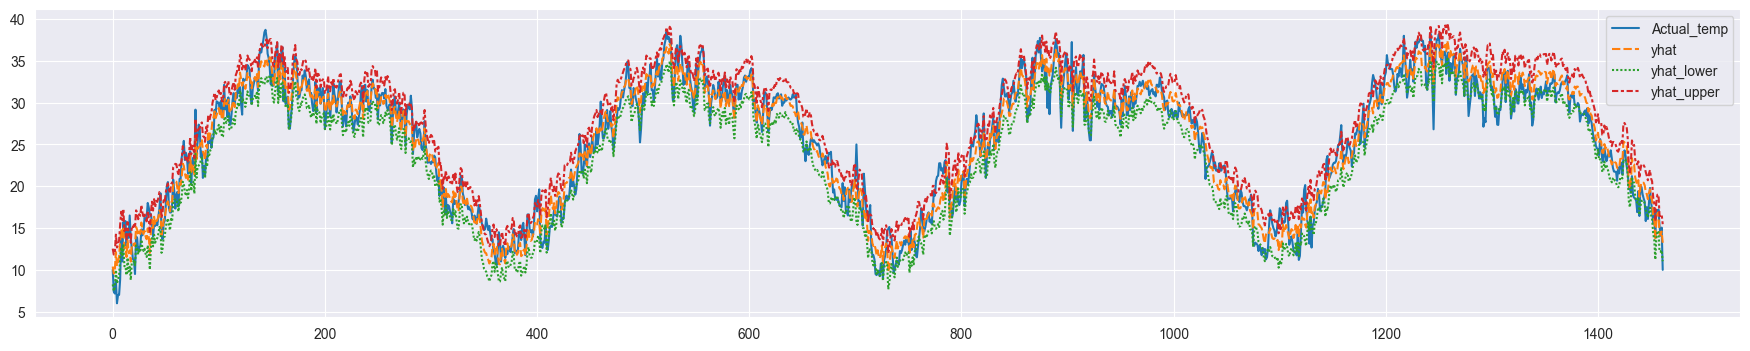

In [52]:
plt.figure(figsize=(22,4))
sns.lineplot(data = forecast[['Actual_temp', 'yhat', 'yhat_lower','yhat_upper']]);
# there isn't a big gap between yhat_lower and yhat_upper, so I can trust this model

In [53]:
from prophet.plot import plot_plotly
import plotly.offline as py

plot_plotly(prop_model, forecast)

# black -> actual
# blue -> predicted

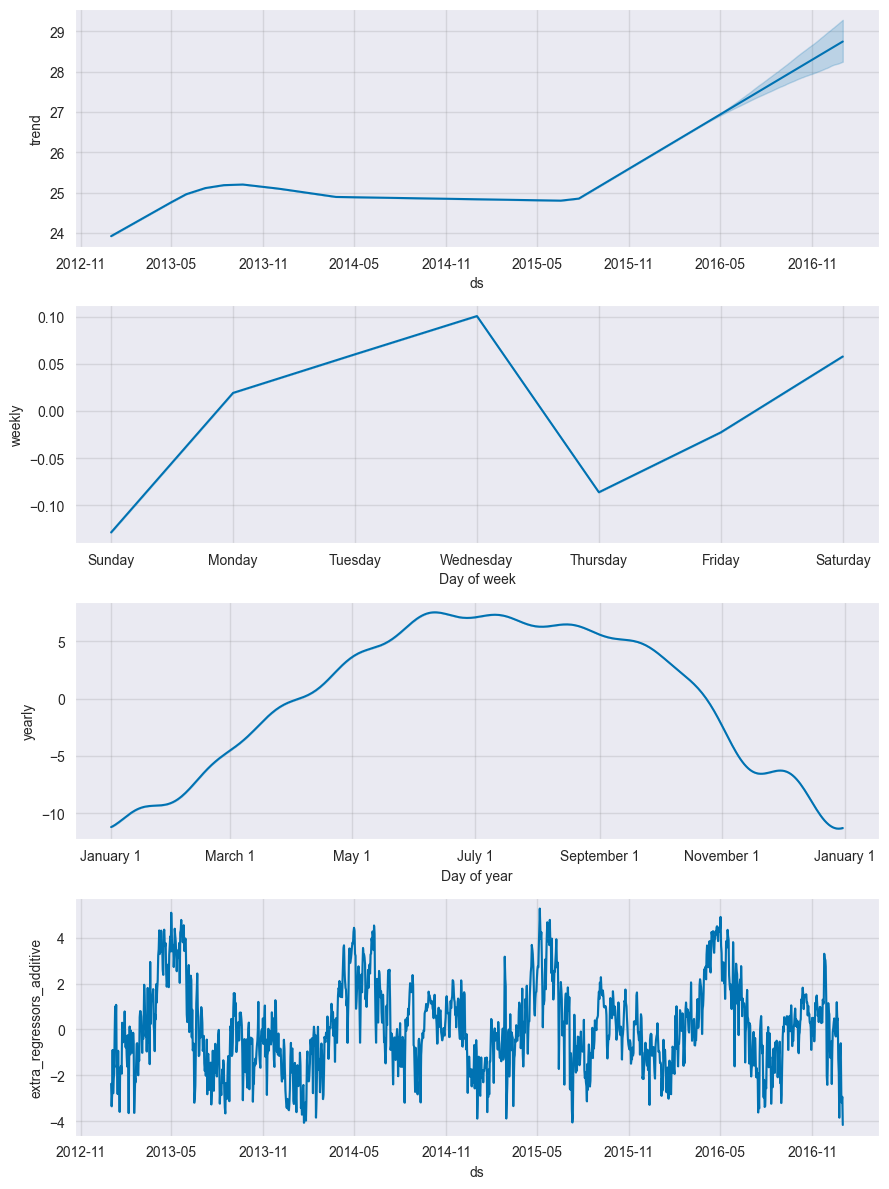

In [54]:
fig = prop_model.plot_components(forecast)

In [55]:
display(test.head(2)) # test data from arima sarima models

display(p_test.head(2)) # test data of prophet model

meantemp  humidity  wind_speed  meantemp_diff
date                                                     
2016-03-15    24.067    58.933       8.647          1.692
2016-03-16    23.938    53.750      10.881         -0.129

ds      y  humidity  wind_speed
1169 2016-03-15 24.067    58.933       8.647
1170 2016-03-16 23.938    53.750      10.881

In [56]:
arima_pred # predictions of ARIMA

2016-03-15   22.826
2016-03-16   23.086
2016-03-17   23.235
2016-03-18   23.321
2016-03-19   23.370
              ...  
2016-12-28   23.437
2016-12-29   23.437
2016-12-30   23.437
2016-12-31   23.437
2017-01-01   23.437
Freq: D, Name: predicted_mean, Length: 293, dtype: float64

In [57]:
sarima_pred # predictions of SARIMA

2016-03-15   22.846
2016-03-16   23.078
2016-03-17   23.245
2016-03-18   23.085
2016-03-19   23.093
              ...  
2016-12-28   20.619
2016-12-29   20.158
2016-12-30   19.746
2016-12-31   19.357
2017-01-01   18.886
Freq: D, Name: predicted_mean, Length: 293, dtype: float64

In [58]:
predicted.head() # predictions of prophet

yhat
ds               
2016-03-15 24.531
2016-03-16 25.273
2016-03-17 25.821
2016-03-18 24.806
2016-03-19 25.112

In [59]:
pred_df = test.copy()  # copying test data from arima sarima models (for daily comparision)
pred_df.head()

meantemp  humidity  wind_speed  meantemp_diff
date                                                     
2016-03-15    24.067    58.933       8.647          1.692
2016-03-16    23.938    53.750      10.881         -0.129
2016-03-17    26.312    50.312       6.844          2.375
2016-03-18    26.188    61.250       6.713         -0.125
2016-03-19    26.786    61.857       3.579          0.598

In [60]:
display(m_test.head()) # monthly test data

m_test["arima_pred_m"] = arima_pred_m.values.round(2)
m_test["sarima_pred_m"] = sarima_pred_m.values.round(2)
m_test["auto_arima_pred"] = auto_arima_pred.values.round(2)

display(m_test.head())

meantemp  humidity  wind_speed  meantemp_diff
date                                                     
2016-04-30    32.550    29.244       9.687          0.102
2016-05-31    34.729    38.959       9.506         -0.014
2016-06-30    34.947    51.760       9.052          0.094
2016-07-31    30.876    75.430       6.207         -0.200
2016-08-31    31.117    72.993       7.168         -0.065

meantemp  humidity  wind_speed  meantemp_diff  arima_pred_m  \
date                                                                      
2016-04-30    32.550    29.244       9.687          0.102        25.310   
2016-05-31    34.729    38.959       9.506         -0.014        24.990   
2016-06-30    34.947    51.760       9.052          0.094        24.720   
2016-07-31    30.876    75.430       6.207         -0.200        24.500   
2016-08-31    31.117    72.993       7.168         -0.065        24.320   

            sarima_pred_m  auto_arima_pred  
date                                        
2016-04-30         30.690           28.700  
2016-05-31         32.250           32.910  
2016-06-30         33.090           34.550  
2016-07-31         30.240           31.990  
2016-08-31         30.000           31.610

In [61]:
# Adding predictions of ARIMA, SARIMA, and Prophet

pred_df["arima_pred"] = arima_pred.values.round(2)
pred_df["sarima_pred"] = sarima_pred.values.round(2)
pred_df["prophet_yhat"] = predicted["yhat"].values.round(2)

pred_df.head()

meantemp  humidity  wind_speed  meantemp_diff  arima_pred  \
date                                                                    
2016-03-15    24.067    58.933       8.647          1.692      22.830   
2016-03-16    23.938    53.750      10.881         -0.129      23.090   
2016-03-17    26.312    50.312       6.844          2.375      23.230   
2016-03-18    26.188    61.250       6.713         -0.125      23.320   
2016-03-19    26.786    61.857       3.579          0.598      23.370   

            sarima_pred  prophet_yhat  
date                                   
2016-03-15       22.850        24.530  
2016-03-16       23.080        25.270  
2016-03-17       23.250        25.820  
2016-03-18       23.080        24.810  
2016-03-19       23.090        25.110

In [62]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import math

prophet_mape = mean_absolute_percentage_error(pred_df["meantemp"].values, pred_df["prophet_yhat"].values)
prophet_r = r2_score(pred_df["meantemp"].values, pred_df["prophet_yhat"].values)
prophet_rmse = math.sqrt(mean_squared_error(pred_df["meantemp"].values, pred_df["prophet_yhat"].values))

arima_mape = mean_absolute_percentage_error(pred_df["meantemp"].values, pred_df["arima_pred"].values)
arima_r = r2_score(pred_df["meantemp"].values, pred_df["arima_pred"].values)
arima_rmse = math.sqrt(mean_squared_error(pred_df["meantemp"].values, pred_df["arima_pred"].values))

sarima_mape = mean_absolute_percentage_error(pred_df["meantemp"].values, pred_df["sarima_pred"].values)
sarima_r = r2_score(pred_df["meantemp"].values, pred_df["sarima_pred"].values)
sarima_rmse = math.sqrt(mean_squared_error(pred_df["meantemp"].values, pred_df["sarima_pred"].values))

######## monthly predictions #############

arima_mape_m = mean_absolute_percentage_error(m_test["meantemp"].values, m_test["arima_pred_m"].values)
arima_r_m = r2_score(m_test["meantemp"].values, m_test["arima_pred_m"].values)
arima_rmse_m = math.sqrt(mean_squared_error(m_test["meantemp"].values, m_test["arima_pred_m"].values))

sarima_mape_m = mean_absolute_percentage_error(m_test["meantemp"].values, m_test["sarima_pred_m"].values)
sarima_r_m = r2_score(m_test["meantemp"].values, m_test["sarima_pred_m"].values)
sarima_rmse_m = math.sqrt(mean_squared_error(m_test["meantemp"].values, m_test["sarima_pred_m"].values))

autoarima_mape_m = mean_absolute_percentage_error(m_test["meantemp"].values, m_test["auto_arima_pred"].values)
autoarima_r_m = r2_score(m_test["meantemp"].values, m_test["auto_arima_pred"].values)
autoarima_rmse_m = math.sqrt(mean_squared_error(m_test["meantemp"].values, m_test["auto_arima_pred"].values))

compare_df = {
        'Prophet daily': [prophet_mape,prophet_rmse,prophet_r], 
        'ARIMA daily': [arima_mape,arima_rmse,arima_r],
        'SARIMA daily': [sarima_mape,sarima_rmse,sarima_r],
        'ARIMA Monthly': [arima_mape_m,arima_rmse_m,arima_r_m], 
        'SARIMA Monthly': [sarima_mape_m,sarima_rmse_m,sarima_r_m],
        'autoARIMA Monthly': [autoarima_mape_m,autoarima_rmse_m,autoarima_r_m]
             }

compare_df = pd.DataFrame(compare_df,index=['MAE','RMSE','R2'])
compare_df

Prophet daily  ARIMA daily  SARIMA daily  ARIMA Monthly  SARIMA Monthly  \
MAE           0.053        0.245         0.143          0.339           0.080   
RMSE          1.745        8.100         4.806          8.034           1.942   
R2            0.905       -1.050         0.278         -0.077           0.937   

      autoARIMA Monthly  
MAE               0.096  
RMSE              2.250  
R2                0.915

In [63]:
gc.collect()

df.head()

meantemp  humidity  wind_speed
date                                      
2013-01-01    10.000    84.500       0.000
2013-01-02     7.400    92.000       2.980
2013-01-03     7.167    87.000       4.633
2013-01-04     8.667    71.333       1.233
2013-01-05     6.000    86.833       3.700

In [64]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
dl_train, dl_test = df.iloc[:train_size], df.iloc[train_size:]
print(len(dl_train), len(dl_test))

1169 293


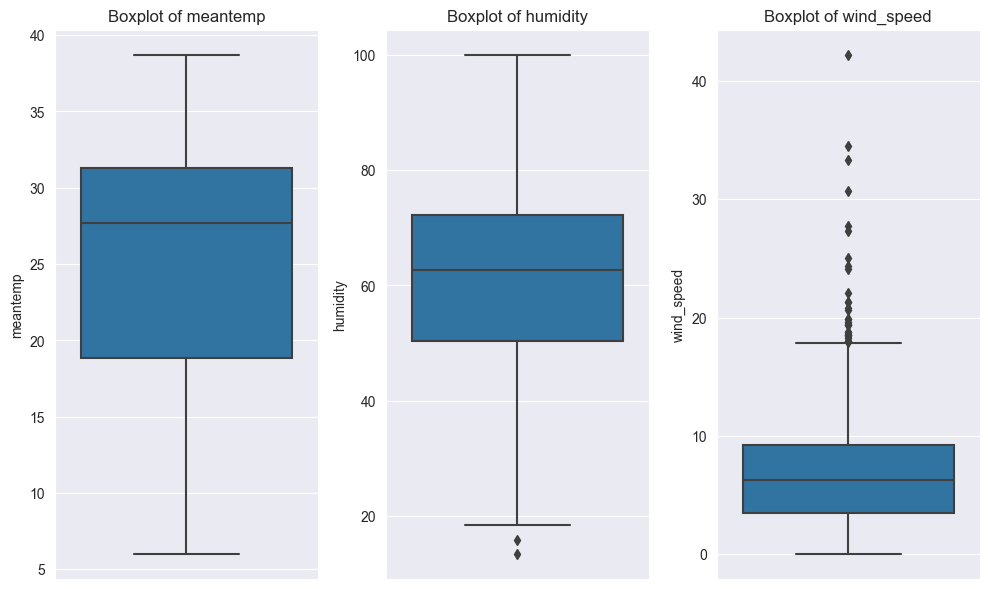

In [65]:
# find out what scaling to perform

f_columns = ['meantemp', 'humidity', 'wind_speed']
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1) 
sns.boxplot(y=df['meantemp'])
plt.title('Boxplot of meantemp')

plt.subplot(1, 3, 2) 
sns.boxplot(y=df['humidity'])
plt.title('Boxplot of humidity')

plt.subplot(1, 3, 3) 
sns.boxplot(y=df['wind_speed'])
plt.title('Boxplot of wind_speed')

plt.tight_layout() 
plt.show()

In [66]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

robust_scaler = RobustScaler()   # scaler for wind_speed
minmax_scaler = MinMaxScaler()  # scaler for humidity
target_transformer = MinMaxScaler()   # scaler for target (meantemp)
dl_train['wind_speed'] = robust_scaler.fit_transform(dl_train[['wind_speed']])  # robust for wind_speed
dl_train['humidity'] = minmax_scaler.fit_transform(dl_train[['humidity']]) # minmax for humidity
dl_train['meantemp'] = target_transformer.fit_transform(dl_train[['meantemp']]) # target

dl_test['wind_speed'] = robust_scaler.transform(dl_test[['wind_speed']])
dl_test['humidity'] = minmax_scaler.transform(dl_test[['humidity']])
dl_test['meantemp'] = target_transformer.transform(dl_test[['meantemp']])
display(df.head())
display(dl_train.head())

meantemp  humidity  wind_speed
date                                      
2013-01-01    10.000    84.500       0.000
2013-01-02     7.400    92.000       2.980
2013-01-03     7.167    87.000       4.633
2013-01-04     8.667    71.333       1.233
2013-01-05     6.000    86.833       3.700

meantemp  humidity  wind_speed
date                                      
2013-01-01     0.122     0.840      -1.018
2013-01-02     0.043     0.929      -0.496
2013-01-03     0.036     0.870      -0.207
2013-01-04     0.082     0.685      -0.802
2013-01-05     0.000     0.868      -0.370

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping

def create_dataset(X, y, time_steps=1):  
    Xs, ys = [], []   
    for i in range(len(X) - time_steps):   
        v = X.iloc[i:(i + time_steps)].values 
        Xs.append(v)      
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)  

In [68]:
# Create sequences
sequence_length = 3  # Example sequence length (adjust based on your data and experimentation)
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['meantemp'], sequence_length)

In [69]:
# Build the model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = rnn_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = rnn_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30
1166/1166 [==============================] - 3s 2ms/step - loss: 0.0163 - val_loss: 0.0059
Epoch 2/30
1166/1166 [==============================] - 2s 2ms/step - loss: 0.0061 - val_loss: 0.0046
Epoch 3/30
1166/1166 [==============================] - 2s 2ms/step - loss: 0.0049 - val_loss: 0.0032
Epoch 4/30
1166/1166 [==============================] - 2s 2ms/step - loss: 0.0046 - val_loss: 0.0293
Epoch 5/30
1166/1166 [==============================] - 2s 2ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 6/30
1166/1166 [==============================] - 2s 2ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 7/30
1166/1166 [==============================] - 2s 2ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 8/30
1166/1166 [==============================] - 3s 2ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 9/30
1166/1166 [==============================] - 3s 2ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 10/30
1166/1166 [==============================] - 2s 2ms/step - loss: 0.003

In [70]:
# Make predictions
rnn_pred = rnn_model.predict(X_test)
rnn_pred = target_transformer.inverse_transform(rnn_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

10/10 [==============================] - 0s 1ms/step


In [71]:
# Calculate RMSE and R2 scores
rmse = np.sqrt(mean_squared_error(y_test, rnn_pred))
r2 = r2_score(y_test, rnn_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

RMSE: 1.678087365640613
R2 Score: 0.9123414448133457


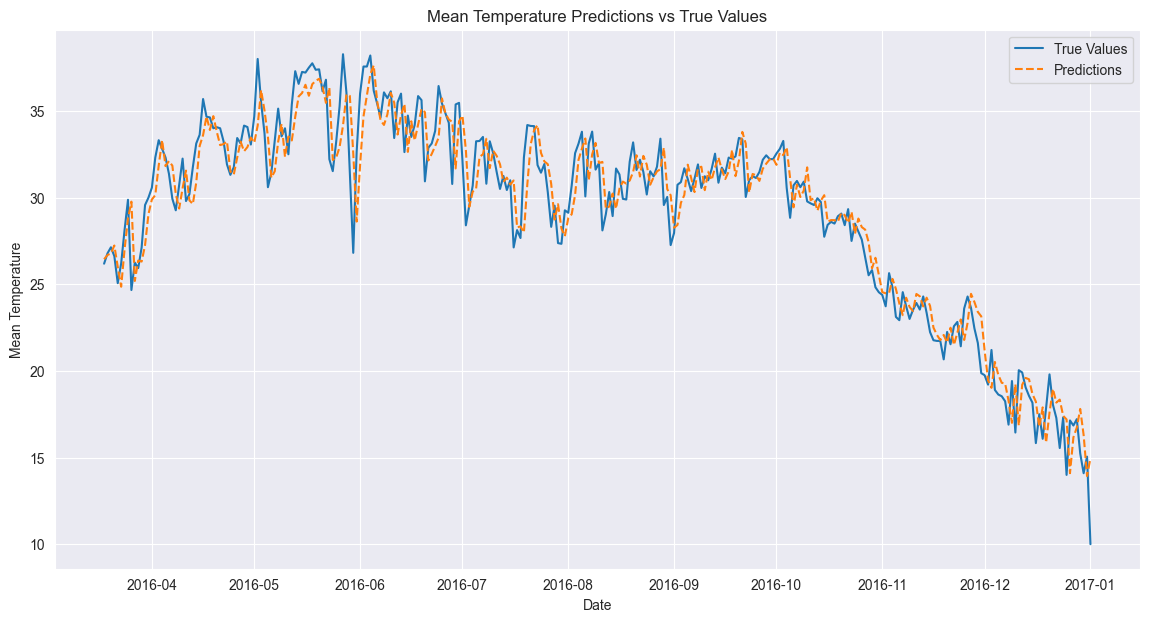

In [72]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], rnn_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

In [73]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,501
Trainable params: 10,501
Non-trainable params: 0
_________________________________________________________________


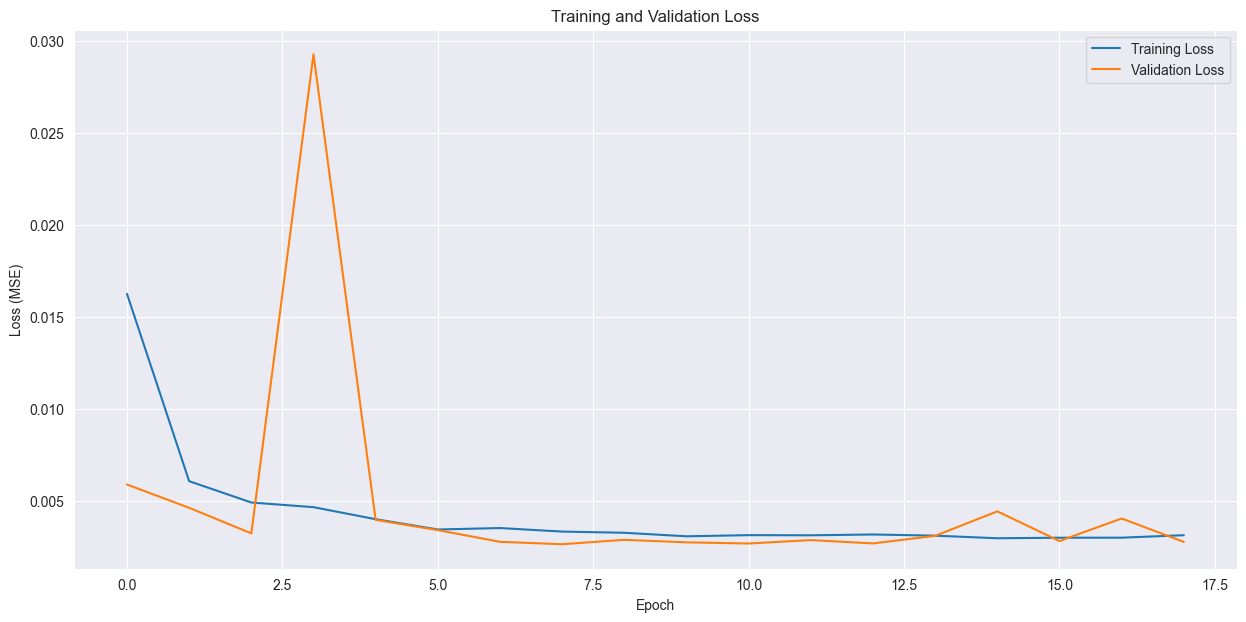

In [74]:
# Get training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [75]:
sequence_length = 3  # Example sequence length (adjust based on your data and experimentation)
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['meantemp'], sequence_length)

In [76]:
from tensorflow.keras.layers import LSTM

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = lstm_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30
1166/1166 [==============================] - 5s 3ms/step - loss: 0.0084 - val_loss: 0.0039
Epoch 2/30
1166/1166 [==============================] - 2s 2ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 3/30
1166/1166 [==============================] - 3s 2ms/step - loss: 0.0037 - val_loss: 0.0043
Epoch 4/30
1166/1166 [==============================] - 2s 2ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 5/30
1166/1166 [==============================] - 3s 2ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 6/30
1166/1166 [==============================] - 3s 3ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 7/30
1166/1166 [==============================] - 4s 3ms/step - loss: 0.0033 - val_loss: 0.0044
Epoch 8/30
1166/1166 [==============================] - 4s 3ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 9/30
1166/1166 [==============================] - 3s 3ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 10/30
1166/1166 [==============================] - 3s 2ms/step - loss: 0.003

In [77]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               41600     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 41,701
Trainable params: 41,701
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Make predictions
lstm_pred = lstm_model.predict(X_test)
lstm_pred = target_transformer.inverse_transform(lstm_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

10/10 [==============================] - 0s 2ms/step


RMSE: 1.6649224304452144
R2 Score: 0.9137114479070356


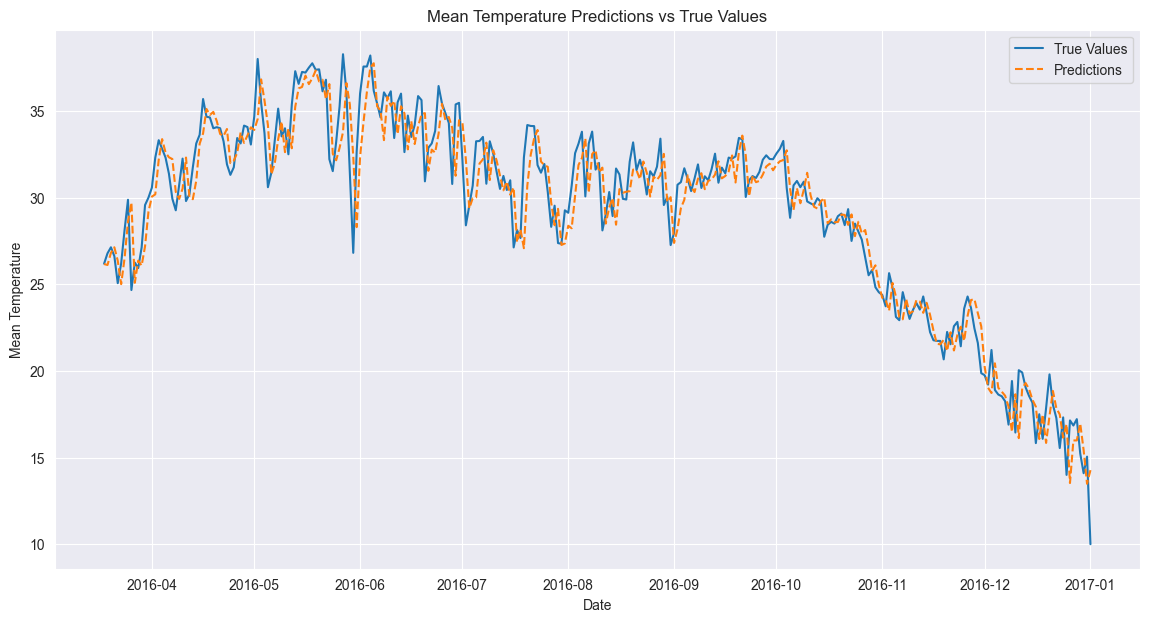

In [79]:
# Calculate RMSE and R2 scores
rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))
r2 = r2_score(y_test, lstm_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], lstm_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

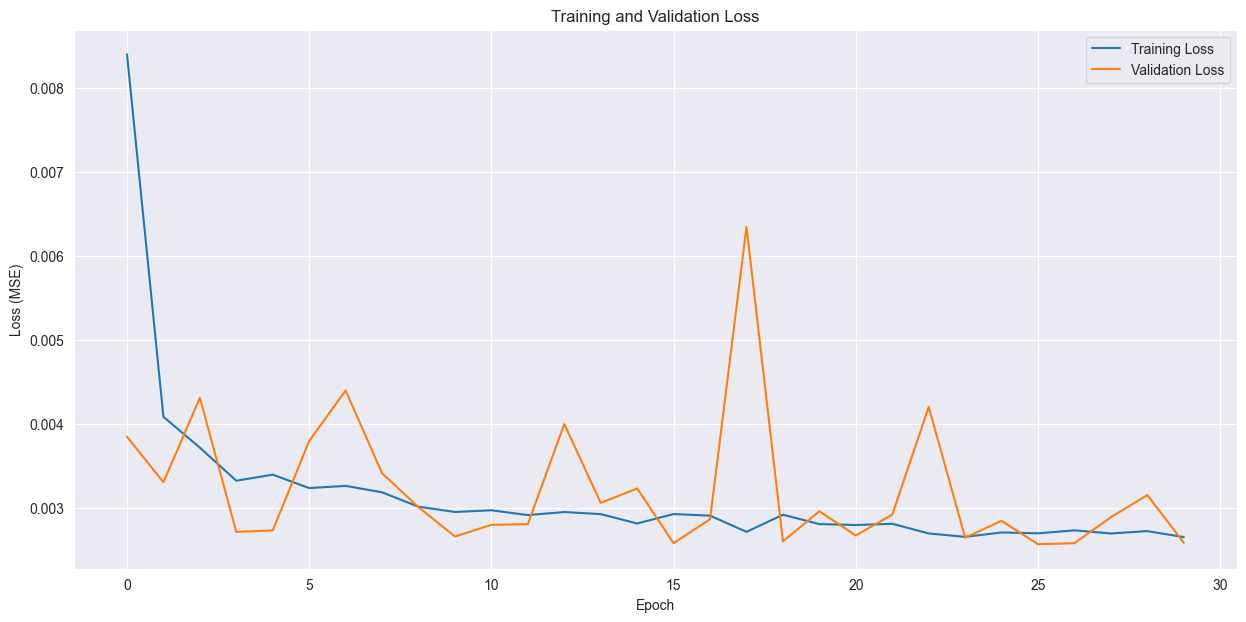

In [80]:
# Get training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [81]:
# Create sequences
sequence_length = 3  # Example sequence length (adjust based on your data and experimentation)
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['meantemp'], sequence_length)

In [82]:
from tensorflow.keras.layers import LSTM, Bidirectional

# Build the bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2]))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30
1166/1166 [==============================] - 7s 3ms/step - loss: 0.0074 - val_loss: 0.0048
Epoch 2/30
1166/1166 [==============================] - 3s 2ms/step - loss: 0.0041 - val_loss: 0.0056
Epoch 3/30
1166/1166 [==============================] - 3s 3ms/step - loss: 0.0036 - val_loss: 0.0030
Epoch 4/30
1166/1166 [==============================] - 4s 3ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 5/30
1166/1166 [==============================] - 4s 3ms/step - loss: 0.0033 - val_loss: 0.0054
Epoch 6/30
1166/1166 [==============================] - 3s 3ms/step - loss: 0.0034 - val_loss: 0.0028
Epoch 7/30
1166/1166 [==============================] - 3s 3ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 8/30
1166/1166 [==============================] - 3s 2ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 9/30
1166/1166 [==============================] - 3s 3ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 10/30
1166/1166 [==============================] - 3s 3ms/step - loss: 0.003

In [83]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 200)              83200     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 83,401
Trainable params: 83,401
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Make predictions
bilstm_pred = model.predict(X_test)
bilstm_pred = target_transformer.inverse_transform(bilstm_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

10/10 [==============================] - 1s 2ms/step


RMSE: 1.662367631772543
R2 Score: 0.9139760617242301


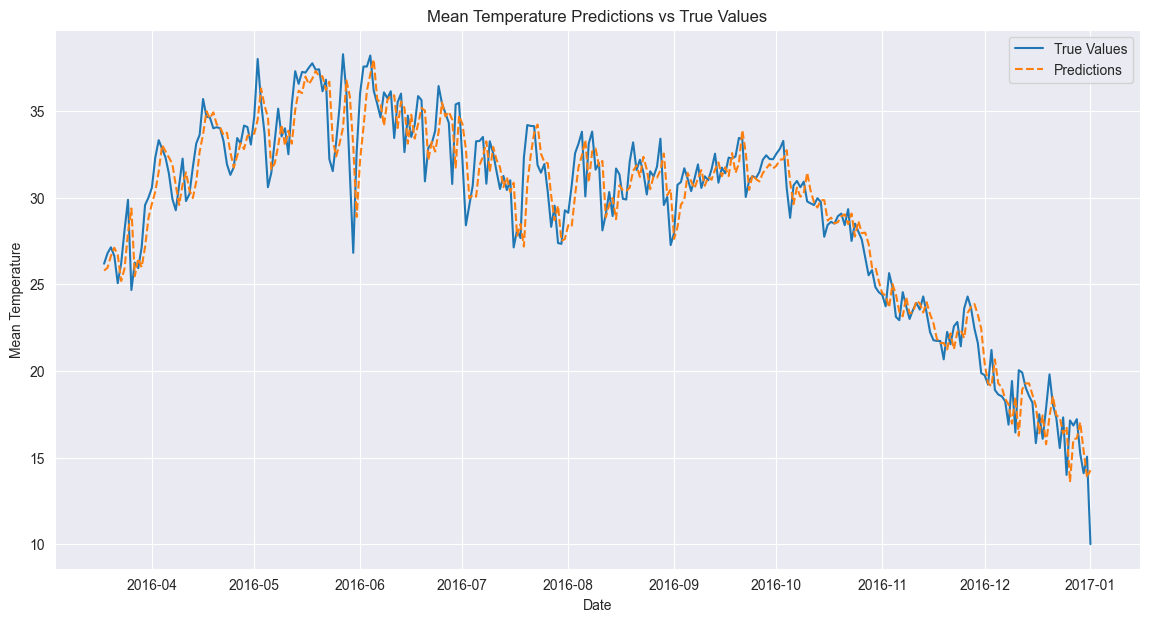

In [85]:
# Calculate RMSE and R2 scores
rmse = np.sqrt(mean_squared_error(y_test, bilstm_pred))
r2 = r2_score(y_test, bilstm_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], bilstm_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

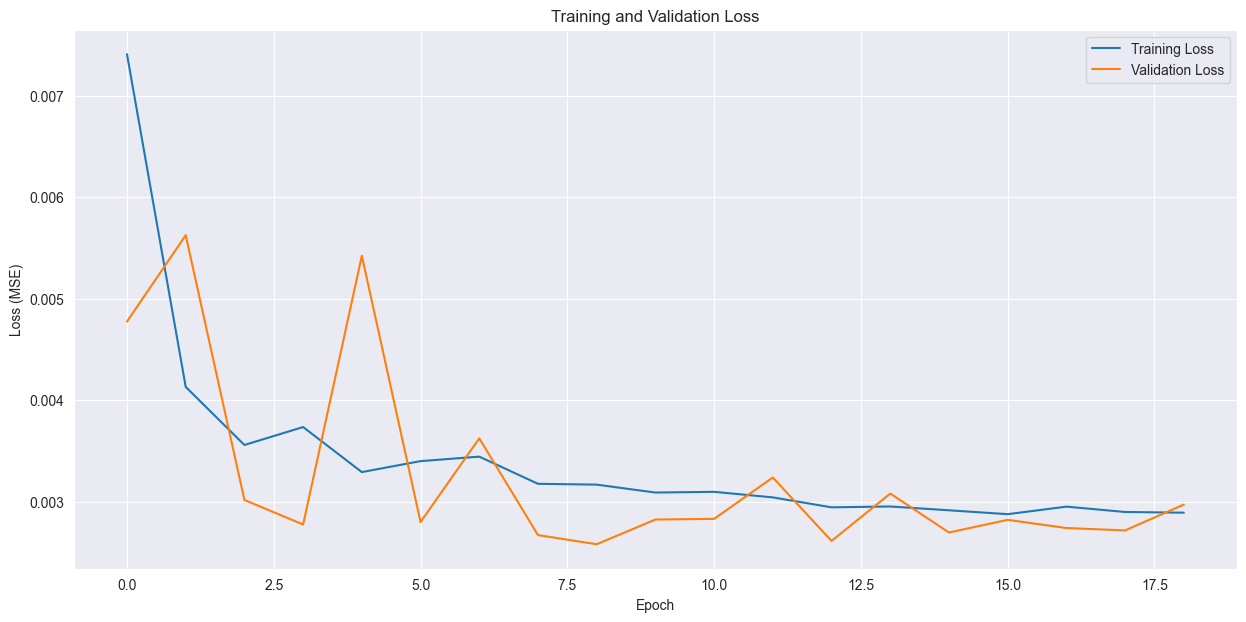

In [86]:
# Get training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [87]:
# Create sequences
sequence_length = 3  # Example sequence length (adjust based on your data and experimentation)
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['meantemp'], sequence_length)

In [88]:
from tensorflow.keras.layers import GRU

# Build the GRU model
gru_model = Sequential()
gru_model.add(GRU(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = gru_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = gru_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30
1166/1166 [==============================] - 4s 2ms/step - loss: 0.0081 - val_loss: 0.0042
Epoch 2/30
1166/1166 [==============================] - 3s 2ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 3/30
1166/1166 [==============================] - 3s 2ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 4/30
1166/1166 [==============================] - 3s 2ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 5/30
1166/1166 [==============================] - 3s 3ms/step - loss: 0.0032 - val_loss: 0.0036
Epoch 6/30
1166/1166 [==============================] - 3s 3ms/step - loss: 0.0033 - val_loss: 0.0037
Epoch 7/30
1166/1166 [==============================] - 3s 3ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 8/30
1166/1166 [==============================] - 2s 2ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 9/30
1166/1166 [==============================] - 2s 2ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 10/30
1166/1166 [==============================] - 2s 2ms/step - loss: 0.003

In [89]:
gru_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100)               31500     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 31,601
Trainable params: 31,601
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Make predictions
gru_pred = gru_model.predict(X_test)
gru_pred = target_transformer.inverse_transform(gru_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

10/10 [==============================] - 0s 2ms/step


RMSE: 1.730358033435805
R2 Score: 0.906795448674621


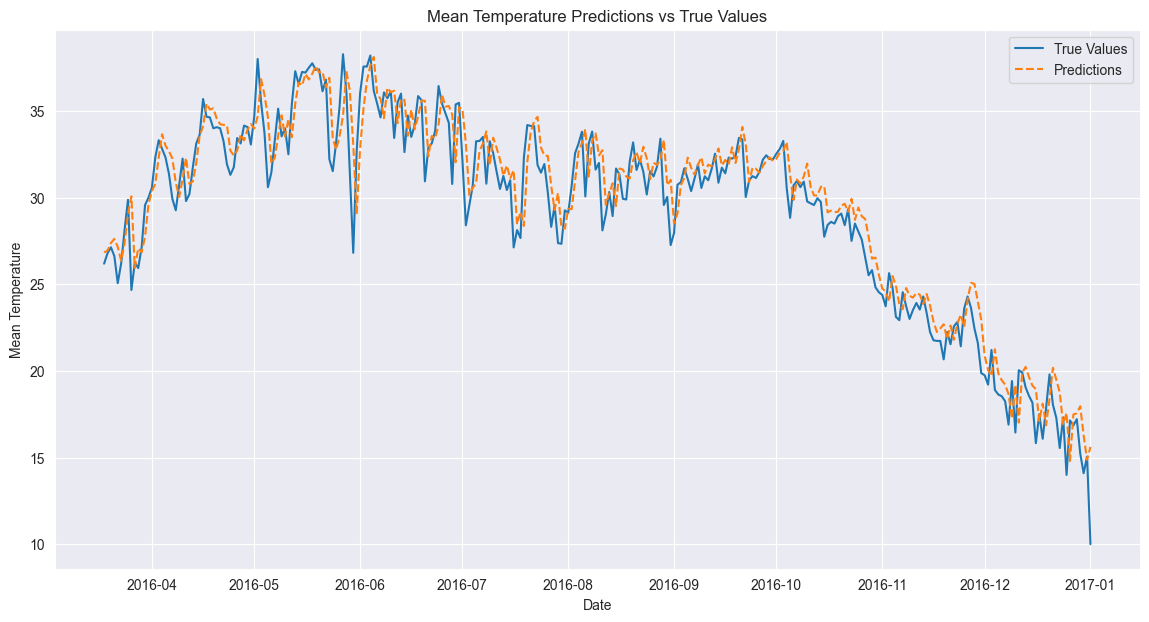

In [91]:
# Calculate RMSE and R2 scores
rmse = np.sqrt(mean_squared_error(y_test, gru_pred))
r2 = r2_score(y_test, gru_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], gru_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

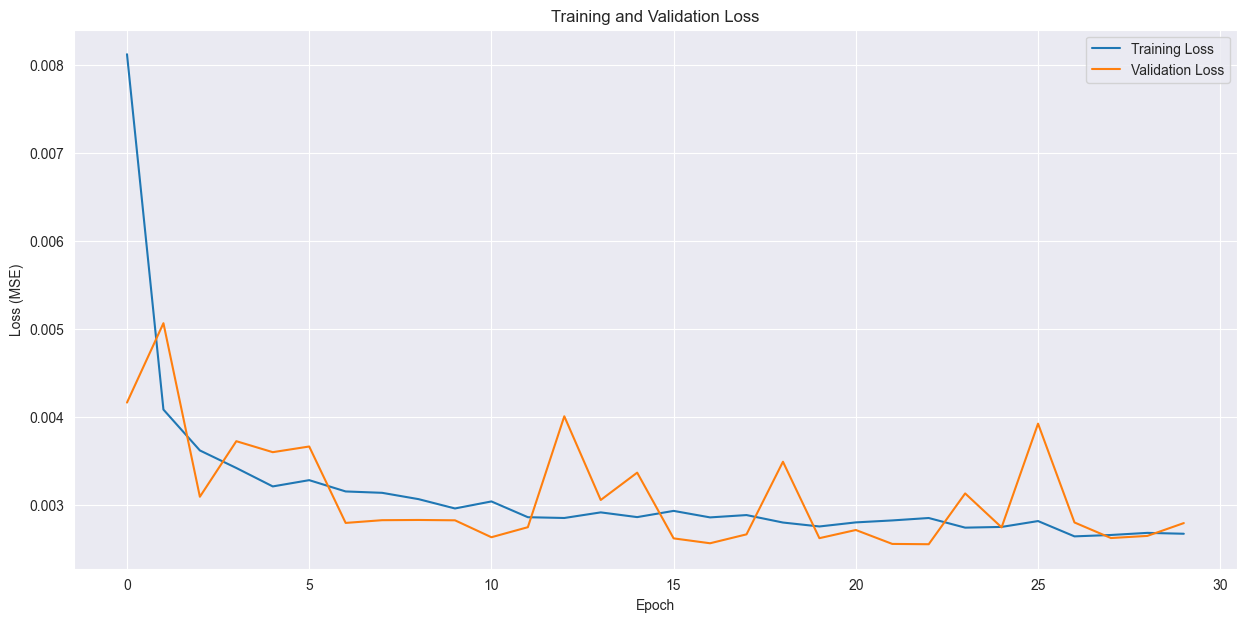

In [92]:
# Get training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [93]:
display(pred_df.head())
display(compare_df.head())

meantemp  humidity  wind_speed  meantemp_diff  arima_pred  \
date                                                                    
2016-03-15    24.067    58.933       8.647          1.692      22.830   
2016-03-16    23.938    53.750      10.881         -0.129      23.090   
2016-03-17    26.312    50.312       6.844          2.375      23.230   
2016-03-18    26.188    61.250       6.713         -0.125      23.320   
2016-03-19    26.786    61.857       3.579          0.598      23.370   

            sarima_pred  prophet_yhat  
date                                   
2016-03-15       22.850        24.530  
2016-03-16       23.080        25.270  
2016-03-17       23.250        25.820  
2016-03-18       23.080        24.810  
2016-03-19       23.090        25.110

Prophet daily  ARIMA daily  SARIMA daily  ARIMA Monthly  SARIMA Monthly  \
MAE           0.053        0.245         0.143          0.339           0.080   
RMSE          1.745        8.100         4.806          8.034           1.942   
R2            0.905       -1.050         0.278         -0.077           0.937   

      autoARIMA Monthly  
MAE               0.096  
RMSE              2.250  
R2                0.915

In [94]:
rnn_mape = mean_absolute_percentage_error(y_test, rnn_pred)
rnn_r = r2_score(y_test, rnn_pred)
rnn_rmse = math.sqrt(mean_squared_error(y_test, rnn_pred))

lstm_mape = mean_absolute_percentage_error(y_test, lstm_pred)
lstm_r = r2_score(y_test, lstm_pred)
lstm_rmse = math.sqrt(mean_squared_error(y_test, lstm_pred))

bilstm_mape = mean_absolute_percentage_error(y_test, bilstm_pred)
bilstm_r = r2_score(y_test, bilstm_pred)
bilstm_rmse = math.sqrt(mean_squared_error(y_test, bilstm_pred))

gru_mape = mean_absolute_percentage_error(y_test, gru_pred)
gru_r = r2_score(y_test, gru_pred)
gru_rmse = math.sqrt(mean_squared_error(y_test, gru_pred))

dl_compare = {
        'RNN daily': [rnn_mape,rnn_rmse,rnn_r], 
        'LSTM daily': [lstm_mape,lstm_rmse,lstm_r],
        'BiLSTM daily': [bilstm_mape,bilstm_rmse,bilstm_r],
        'GRU daily': [gru_mape,gru_rmse,gru_r]
             }

dl_compare = pd.DataFrame(dl_compare,index=['MAE','RMSE','R2'])

# Concatenate dl_compare with compare_df
compare_models_df = pd.concat([compare_df, dl_compare], axis=1)
compare_models_df

Prophet daily  ARIMA daily  SARIMA daily  ARIMA Monthly  SARIMA Monthly  \
MAE           0.053        0.245         0.143          0.339           0.080   
RMSE          1.745        8.100         4.806          8.034           1.942   
R2            0.905       -1.050         0.278         -0.077           0.937   

      autoARIMA Monthly  RNN daily  LSTM daily  BiLSTM daily  GRU daily  
MAE               0.096      0.048       0.046         0.046      0.049  
RMSE              2.250      1.678       1.665         1.662      1.730  
R2                0.915      0.912       0.914         0.914      0.907

In [95]:
compare_models_df.columns

Index(['Prophet daily', 'ARIMA daily', 'SARIMA daily', 'ARIMA Monthly',
       'SARIMA Monthly', 'autoARIMA Monthly', 'RNN daily', 'LSTM daily',
       'BiLSTM daily', 'GRU daily'],
      dtype='object')

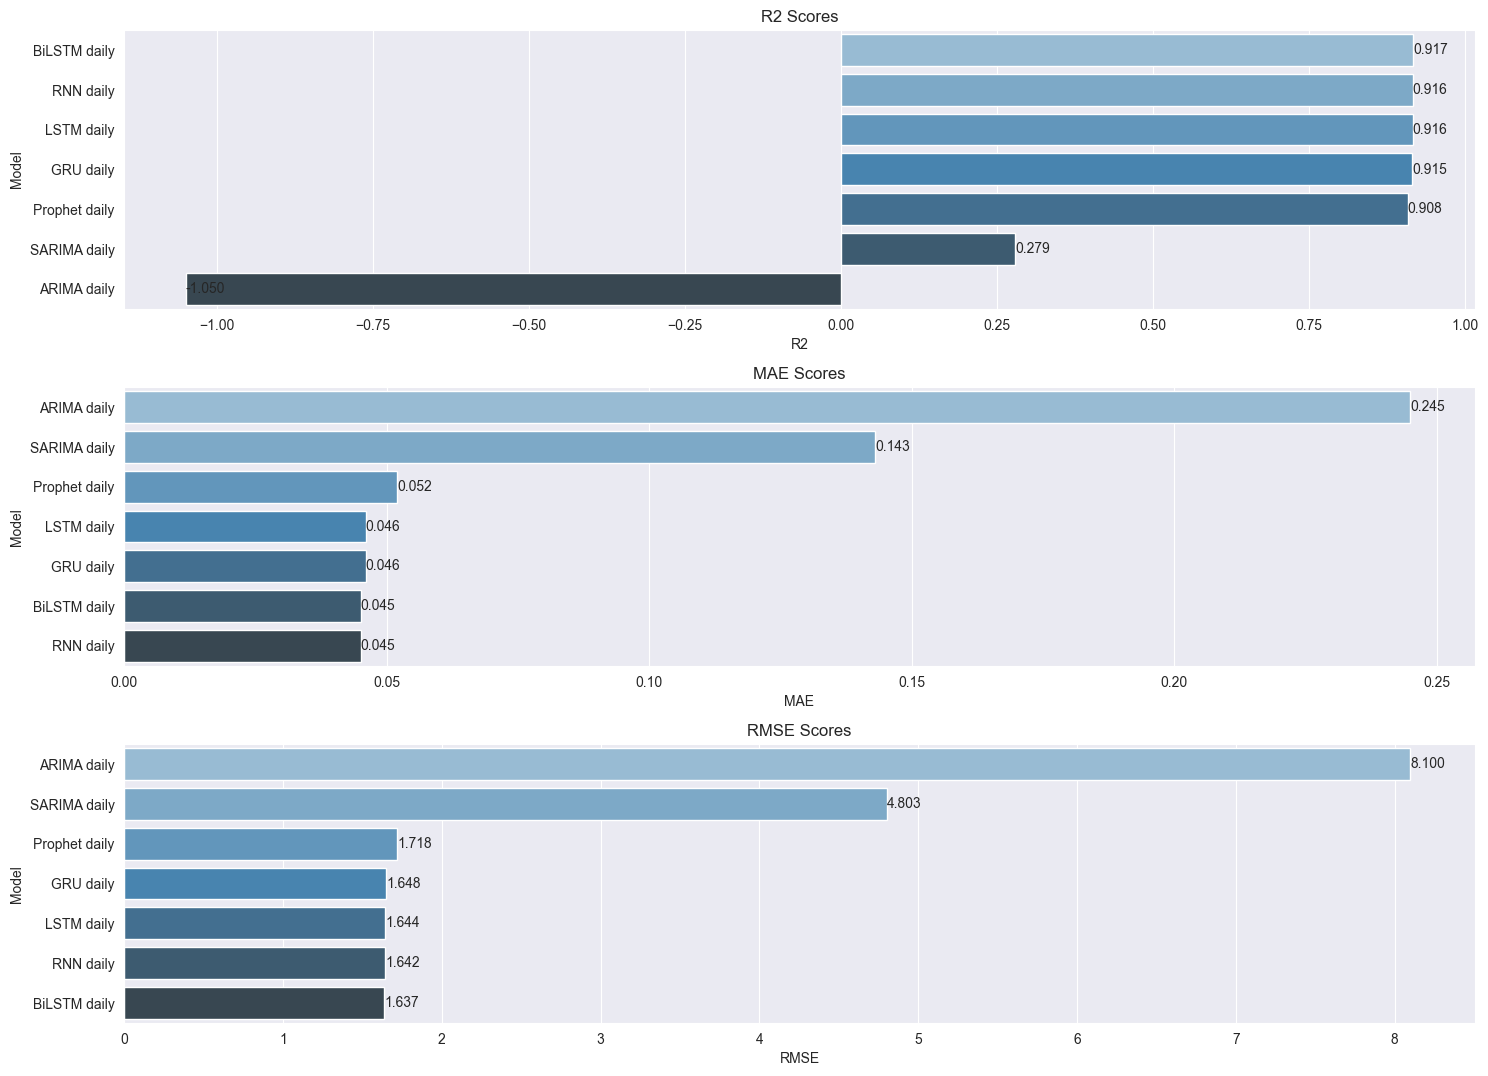

In [96]:
data = {
    'Model': ['Prophet daily', 'ARIMA daily', 'SARIMA daily', 'RNN daily', 'LSTM daily', 'BiLSTM daily', 'GRU daily'],
    'MAE': [0.052, 0.245, 0.143, 0.045, 0.046, 0.045, 0.046],
    'RMSE': [1.718, 8.100, 4.803, 1.642, 1.644, 1.637, 1.648],
    'R2': [0.908, -1.050, 0.279, 0.916, 0.916, 0.917, 0.915]
}

compare = pd.DataFrame(data)

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        
        ax.text(width,                              
                p.get_y() + p.get_height() / 2,     
                '{:.3f}'.format(width),             
                ha='left',                         
                va='center')  

plt.figure(figsize=(15, 14))

plt.subplot(411)
compare = compare.sort_values(by="R2", ascending=False)
ax = sns.barplot(x="R2", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.title('R2 Scores')

plt.subplot(412)
compare = compare.sort_values(by="MAE", ascending=False)
ax = sns.barplot(x="MAE", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.title('MAE Scores')

plt.subplot(413)
compare = compare.sort_values(by="RMSE", ascending=False)
ax = sns.barplot(x="RMSE", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.title('RMSE Scores')

plt.tight_layout()
plt.show()